#EDA Persiapan Data sebelum melakukan Analisis

##Kasus(Relationship per tabel)
1. Industri mana yang memberikan gaji paling besar/kecil
2. Bagaimana pengaruh pengalaman kerja terhadap gaji: pengalaman kerja di bidang dengan gaji, dan pengalama kerja dengan gaji
3. Bagaimana pengaruh jenis kelamin terhadap gaji
4. Bagaimana pengaruh tingkat pendidikan terhadap gaji
5. Bagaimana pengaruh jenis kelamin terhadap tingkat pendidikan

##Data Discovery & Profiling
- Data discovery & profiling ini dilakukan untuk mengidentifikasi pola, hubungan, dan atribut lain dalam data, serta ketidakkonsistenan, anomali, nilai yang hilang, dan masalah lain sehingga dapat diatasi.
-  Data yang kosong pada suatu kolom akan diisi dengan modus jika mising value dibawah 1% dari total keseluruhan dataset


##Data Discovery per Kolom
1. Kolom Industry 
- Problem: ada field kosong
- Solusi: kita isi field yang kosong dengan sesuaikan menggunakan modus kolom job title

2. Kolom Currency & Other_Currency
- Kasus 1: 
  - Problem: ada entry yang mengisi di kolom currency dan juga di other_currency, sehingga bisa saja field telah terisi currencynya misal "USD" tetapi diisi juga di other_currency. 
  - Solusi: Jadinya, kita cek yang di kolom currency yang memilih "other" dan mengisi di other_currency. Entry selain "other" di currency berarti di kolom other_currency tidak dianalisis.

3. Kolom Education
- Kasus 4: 
  - Problem: ada field kosong
  - Solusi: kita isi field yang kosong dengan sesuaikan menggunakan imputasi modus

4. Kolom Gender
- Kasus 3: 
  - Problem: ada field kosong, dan entry 'other or prefer not to aswer'
  - Solusi: kolom gender untuk menangani field kosong kita pakai cara modus, dan untuk yang memilih 'other or prefer not to answer' kita biarkan karena jumlah data yang memilih option tersebut cukup besar.



## Data Cleansing & Formatting
Kesalahan dan masalah data yang teridentifikasi diperbaiki untuk membuat kumpulan data yang lengkap dan akurat. Misalnya, sebagai bagian dari kumpulan data cleansing, data yang salah dihapus atau diperbaiki, nilai yang hilang diisi dan entri yang tidak konsisten diselaraskan.

Data Cleansing & Formatting pada dataset Salary:
1. Imputasi data per kolom dalam dataset Salary menggunakan nilai modus
2. Format data pada dataset ini kami lakukan pada penyesesuaian currency yang berbeda dengan menyamakan semua currency ke USD. Sehingga kami menambahkan kolom baru bernama usd_salary yang merupakan hasil konversi annual_salary ke currency USD. 

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Membaca Data

In [ ]:
df = pd.read_excel (r'salary_survey.xlsx')
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


#Melakukan Distribusi Data Sebelum Cleaning

Distribusi dilakukan sebelum cleansing untuk melihat persebaran data variabel secara keseluruhan. Dilakukan distribusi dengan seluruh populasi dan distribusi sampel. 100 data random diambil untuk distribusi sampel.

Sebaiknya memang tidak perlu menggunakan seluruh 27000-an data untuk melihat persebaran data dan cukup menggunakan sampel yang representatif dapat memberikan hasil yang sama akuratnya dengan menggunakan seluruh populasi data yang dapat menghemat waktu yang diperlukan untuk mengolah data pada skala yang lebih besar. Namun, pada tugas ini kami ingin mencoba membandingkan dan melihat juga bagaimana persebaran data menggunakan seluruh populasi dan sampel.

##Persebaran Data Industry & Distribusi Sampel

Dilakukan distribusi data pada kolom industry dengan frekuensi kemunculan terbanyak. 

In [ ]:
industry_count = df['industry'].value_counts()
print(industry_count)

industry_unique = df['industry'].unique()
print(industry_unique)

Computing or Tech                       4674
Education (Higher Education)            2458
Nonprofits                              2417
Health care                             1888
Government and Public Administration    1882
                                        ... 
medical research                           1
restoration                                1
IT MSP                                     1
public libraries                           1
Fast food                                  1
Name: industry, Length: 1209, dtype: int64
['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Environmental science '
 'User Experience Design' 'Fast food']


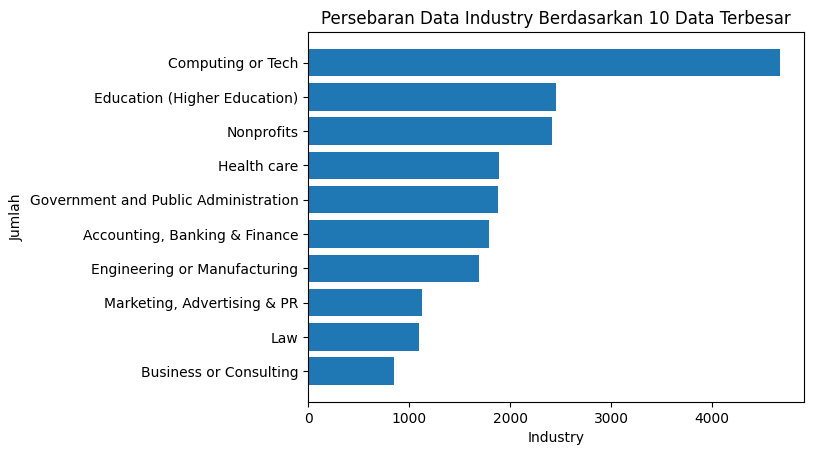

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'industry'
industry_count = df['industry'].value_counts().head(10)

# Membuat plot bar
plt.barh(industry_count.index, industry_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Industry Berdasarkan 10 Data Terbesar')
plt.xlabel('Industry')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Didapatkan bahwa data **industry** dengan frekuensi **kemunculan terbanyak** atau data terbesarnya adalah dari **Computing or Tech; Education; Nonprofits; Health care; Government and Public Administration; Accounting, Banking & Finance; Engineering or Manufacturing; Marketing, Advertising & PR, Law, Business or Consulting.**

Diambil sampel sebanyak 100 data dari kolom industry secara acak untuk membuat distribusi sampel. Berikut visualisasi distribusi sampel sebelum melakukan cleansing.

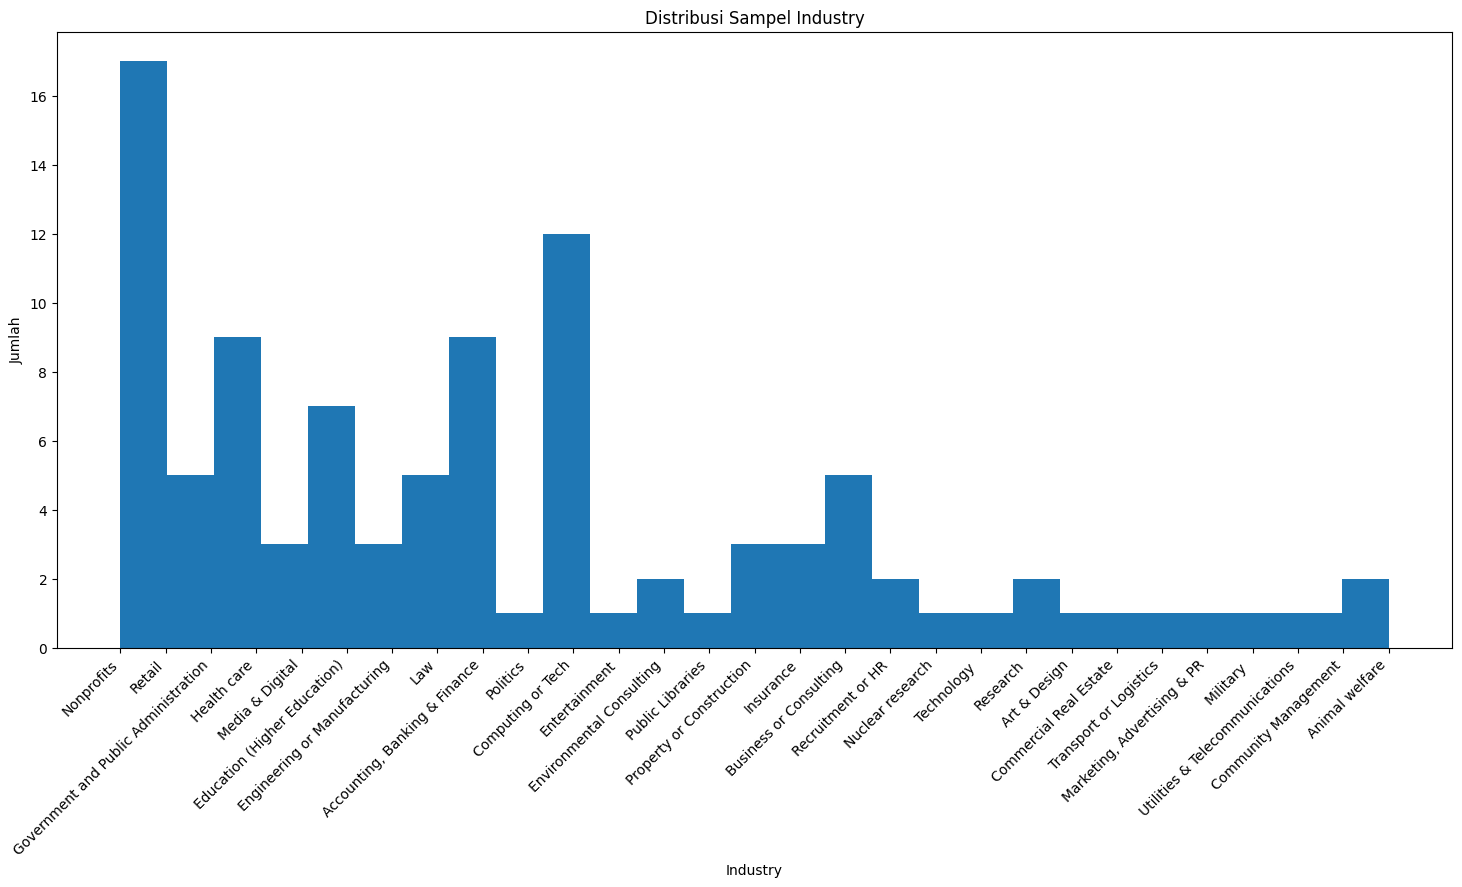

In [ ]:
plt.figure(figsize = (18, 8))
sample_industry = df["industry"].sample(n=100)
# Menambah label dan judul
plt.title('Distribusi Sampel Industry')
plt.xlabel('Industry')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.hist(sample_industry, bins=27)
plt.show()

Adapun jumlah data untuk setiap kategori industry pada distribusi sampel sebagai berikut:

In [ ]:
print(sample_industry.value_counts())

Nonprofits                              15
Computing or Tech                       12
Health care                              9
Accounting, Banking & Finance            9
Education (Higher Education)             7
Government and Public Administration     5
Business or Consulting                   5
Law                                      5
Insurance                                3
Property or Construction                 3
Engineering or Manufacturing             3
Media & Digital                          3
Environmental Consulting                 2
Retail                                   2
Recruitment or HR                        2
Research                                 2
Politics                                 1
Transport or Logistics                   1
Community Management                     1
Utilities & Telecommunications           1
Military                                 1
Marketing, Advertising & PR              1
Technology                               1
Commercial 

##Persebaran Data Salary & Distribusi Sampel

Dilakukan distribusi data pada kolom salary untuk melihat persebaran datanya.

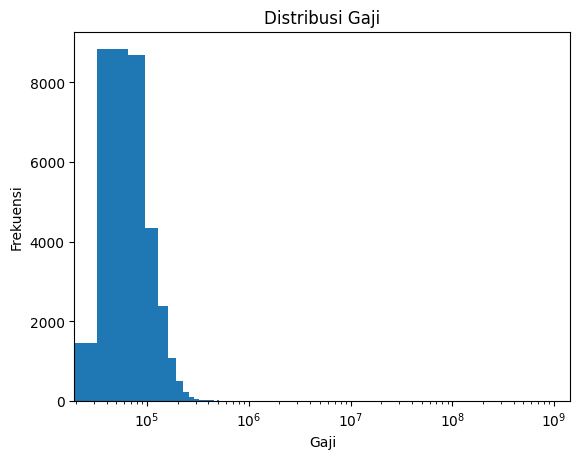

In [ ]:
# Mengatur skala log pada sumbu x
plt.xscale('log')

# Membuat plot histogram dengan bins
plt.hist(df['salary'], bins=27000)

# Menambahkan label sumbu dan judul
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.title('Distribusi Gaji')

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas, didapatkan bahwa data salary **belum** mencapai **distribusi normal.**

Adapun distribusi 100 sampel salary divisualisasikan pada histogram di bawah ini. Distribusi sampel ini dilakukan **sebelum mengubah currency salary** sehingga dapat dilihat persebaran data sampel salary sebagai berikut.

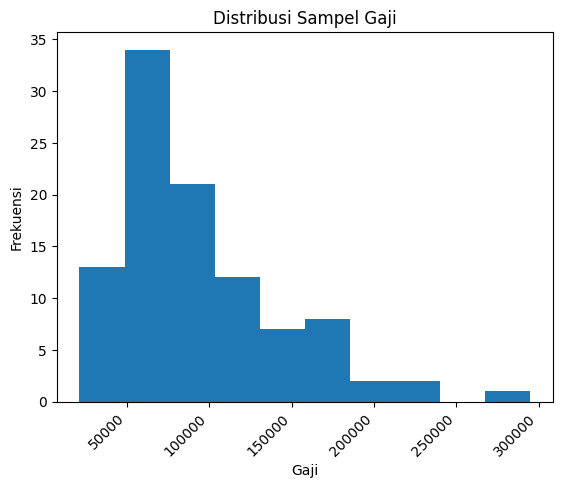

<Figure size 640x480 with 0 Axes>

In [ ]:
# Mengambil 100 data acak dari kolom 'salary'
sample_salary = df["salary"].sample(n=100)

# Membuat histogram
plt.hist(sample_salary, bins=10)

# Menambahkan label sumbu dan judul
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.title('Distribusi Sampel Gaji')

# Menampilkan nilai pada sumbu x dalam format angka
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.show()
plt.tight_layout()

Dari distribusi 100 sampel didapatkan nilai rata-rata salary, minimal, maximal, dll., sebagai berikut:

In [ ]:
print(sample_salary.describe())

count       100.000000
mean      92974.850000
std       50302.837531
min       21179.000000
25%       58375.000000
50%       78721.500000
75%      113500.000000
max      295000.000000
Name: salary, dtype: float64


Adapun nilai gaji unik dari 100 sampel sebagai berikut:

In [ ]:
sample_salary.unique()

array([ 85696,  38000,  62500,  82500,  45760,  50000,  58510,  83000,
        52000,  76000,  71500, 125000, 150000,  69000,  98000, 106193,
       110800,  58500, 175000,  93132,  72000,  42000, 212000,  90000,
       154000,  97000,  62000,  87010,  34000, 135000, 295000, 165000,
        38100,  43696,  80000,  64215,  72800,  51000,  85000,  95000,
       124600,  57000,  21179, 107000,  58000,  88000, 235000,  55000,
       160000,  91000,  45991, 172000, 145000, 108000, 185000, 225000,
        65000,  89401,  56160,  63000,  77443,  35000,  64341,  70291,
       205000, 118000,  72467,  46000,  75000, 159000, 110000, 140000,
        60000, 120000, 112000,  39520,  48000,  60680])

##Persebaran Data Gender & Distribusi Sampel

Dilakukan distribusi data pada kolom gender untuk melihat persebaran datanya.

In [ ]:
gender_count = df['gender'].value_counts()
print(gender_count)

Woman                            21316
Man                               5429
Non-binary                         742
Other or prefer not to answer      291
Prefer not to answer                 1
Name: gender, dtype: int64


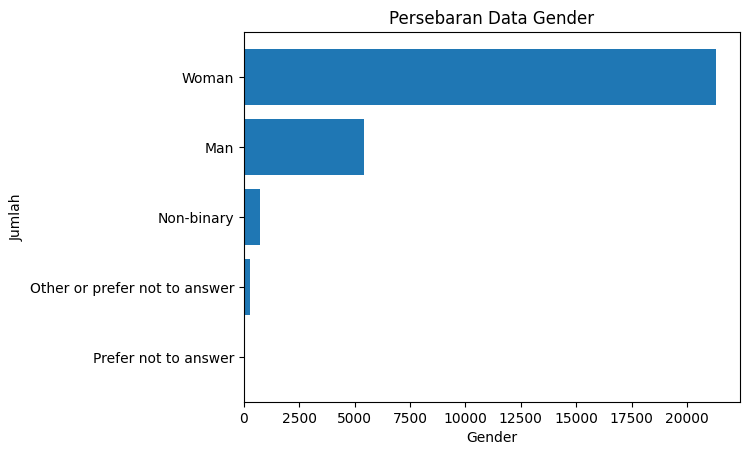

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'gender'
gender_count = df['gender'].value_counts()

# Membuat plot bar
plt.barh(gender_count.index, gender_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Didapatkan bahwa data dengan persebaran **terbanyak** yaitu dari **Woman, Man, Non-Binary, Other or prefer not to answer, dan Prefer not to answer.** Untuk data Prefer not to answer tidak terlihat bar-nya karena hanya terdiri dari 1 data.

Kemudian dilakukan distribusi untuk 1000 sampel.

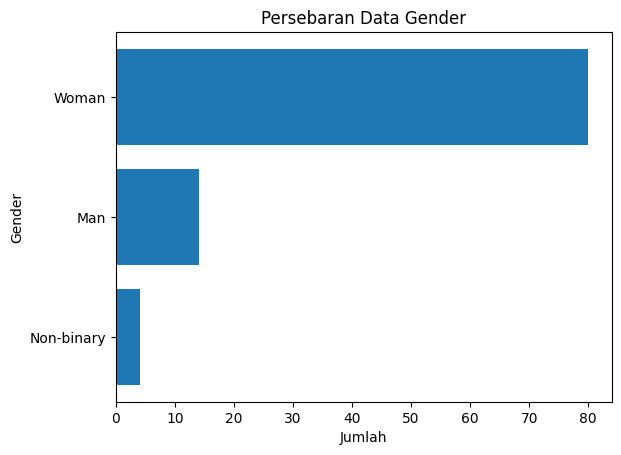

In [ ]:
sample_gender = df["gender"].sample(n=100)

# Menghitung frekuensi gender
gender_count = sample_gender.value_counts()

# Membuat plot bar
plt.barh(gender_count.index, gender_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Gender')
plt.xlabel('Jumlah')
plt.ylabel('Gender')

# Menampilkan plot
plt.show()

In [ ]:
sample_gender.value_counts()

Woman         80
Man           14
Non-binary     4
Name: gender, dtype: int64

Didapatkan bahwa data dengan distribusi **100 sampel** gender yaitu yang terbesar dari **Woman, Man, Non-Binary, dan Other or prefer not to answer.**

##Persebaran Data Currency & Distribusi Sampel

Dilakukan distribusi data pada kolom currency untuk melihat persebaran datanya.

In [ ]:
currency_count = df['currency'].value_counts()
print(currency_count)

USD        23288
CAD         1665
GBP         1585
EUR          637
AUD/NZD      500
Other        156
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: currency, dtype: int64


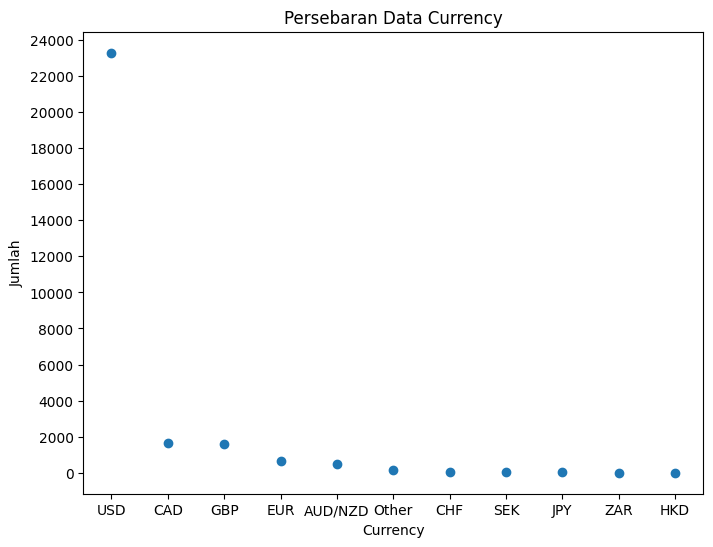

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (8, 6))
currency_count = df['currency'].value_counts()
plt.scatter(currency_count.index, currency_count.values)

# Menambah label dan judul
plt.title('Persebaran Data Currency')
plt.xlabel('Currency')
plt.ylabel('Jumlah')

plt.locator_params(axis='y', nbins=20)
plt.show()
plt.tight_layout()

Kemudian dilakukan distribusi sampel 
berdasarkan 100 mata uang terbanyak.

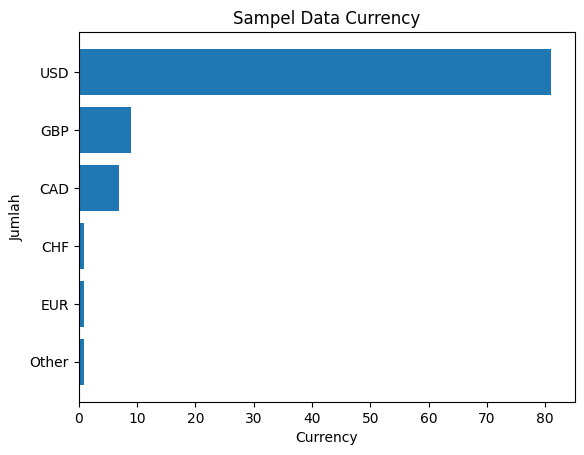

<Figure size 640x480 with 0 Axes>

In [ ]:
# Mengambil sampel 100 data dari kolom 'currency'
sample_currency = df['currency'].sample(n=100)

# Menghitung jumlah frekuensi pada data yang telah disample
currency_count = sample_currency.value_counts()

# Membuat plot bar
plt.barh(currency_count.index, currency_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Sampel Data Currency')
plt.xlabel('Currency')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()
plt.tight_layout()

In [ ]:
sample_currency.value_counts()

USD      81
GBP       9
CAD       7
CHF       1
EUR       1
Other     1
Name: currency, dtype: int64

Didapatkan bahwa data dengan distribusi **100 sampel currency** dari yang **terbesar** yaitu **USD, GBP, CAD, EUR, dan Other.**

##Persebaran Data Education

Dilakukan distribusi data pada kolom education untuk melihat persebaran datanya.

In [ ]:
education_count = df['education'].value_counts()
print(education_count)

College degree                        13466
Master's degree                        8836
Some college                           2050
PhD                                    1424
Professional degree (MD, JD, etc.)     1322
High School                             634
Name: education, dtype: int64


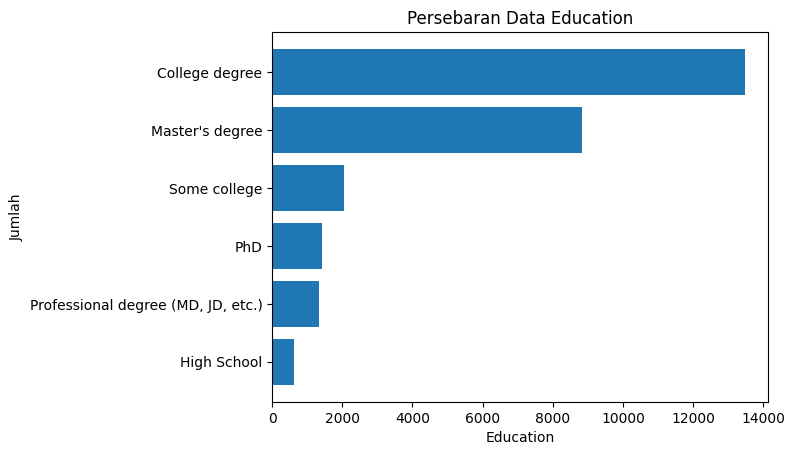

<Figure size 640x480 with 0 Axes>

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'currency'
education_count = df['education'].value_counts()

# Membuat plot bar
plt.barh(education_count.index, education_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()
plt.tight_layout()

Didapatkan bahwa data education dengan frekuensi kemunculan terbanyak atau data terbesarnya adalah dari College degree, Master's degree, Some college, PhD, Professional degree (MD, JD, etc.), dan High School.

#Mengecek dan Mengisi Data Kosong

Dilakukan pengecekan pada data. Apabila terdapat data kosong, dilakukan penanganan agar tidak mempengaruhi hasil analisis. Berikut ini merupakan tahapannya.

##Mengecek Data Kosong

In [ ]:
print(df.isnull().sum())

Timestamp                           0
age                                 0
industry                           72
job_title                           0
job_title_additional_context    20713
salary                              0
additional_salary                7256
currency                            0
other_currency                  27749
income_additional_context       24912
country                             0
us_country                       4982
city                               75
work_experience_overall             0
work_experience_professional        0
education                         214
gender                            167
race                              169
dtype: int64


Terlihat terdapat data kosong pada beberapa kolom. Agar analisis datanya lebih maksimal, kolom dengan value kosong harus diisi.

##Mengisi Missing Value

Pengisian missing value hanya dilakukan pada kolom yang dianalisis. Berikut ini tahapannya.

### Missing Value Kolom Industry & Imputasi Modus
Pada kolom Industry terdapat 72 field kosong. Untuk mengatasi hal tersebut, dilakukan pengambilan nilai modus di kolom industry untuk setiap nilai job_title yang terisi. Kemudian, missing value di kolom industry diisi dengan nilai modus yang sesuai dengan job_title 

In [ ]:
# Membuat DataFrame baru hanya dengan data yang memiliki missing value di kolom industry
missing_industry_df = df[df['industry'].isnull()]

# Filter data yang memiliki nilai di kolom job_title
missing_industry_with_jobtitle_df = missing_industry_df[missing_industry_df['job_title'].notna()]

# Tampilkan data yang memiliki missing value di kolom industry dan nilai di bagian kolom job_title
missing_industry_with_jobtitle_df

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race
360,2021-04-27 11:08:41.197,45-54,NaN,Proposal Manager,NaN,87938,4000.0,USD,NaN,NaN,US,North Carolina,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White
645,2021-04-27 11:12:58.989,35-44,NaN,Legal editor,NaN,82000,8200.0,USD,NaN,NaN,USA,New York,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White
1604,2021-04-27 11:28:19.790,25-34,NaN,Commissioning Editor,NaN,36000,NaN,GBP,NaN,NaN,UK,NaN,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
2055,2021-04-27 11:37:01.190,35-44,NaN,Research Manager,NaN,115000,NaN,USD,NaN,NaN,US,District of Columbia,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White
2063,2021-04-27 11:37:11.960,35-44,NaN,office manager,manage a building vs managing employees,40000,NaN,USD,NaN,NaN,USA,Nevada,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27250,2021-10-26 13:46:24.184,55-64,NaN,Technician Automation,NaN,35000,0.0,EUR,NaN,NaN,Ireland,NaN,Donegal,31 - 40 years,31 - 40 years,Master's degree,Man,White
27592,2021-12-28 18:15:36.647,45-54,NaN,Associate professor,Tenured,80000,0.0,USD,NaN,"Humanities, regional state college",USA,New Hampshire,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White
27730,2022-03-27 10:59:32.710,18-24,NaN,chief executive official,NaN,50,NaN,ZAR,NaN,NaN,spain,NaN,castellon,8 - 10 years,11 - 20 years,NaN,NaN,NaN
27853,2022-08-04 18:33:50.141,18-24,NaN,Archivist,NaN,50000,NaN,USD,NaN,NaN,United States,Wisconsin,Madison,2 - 4 years,2 - 4 years,Master's degree,Man,White


In [ ]:
# Cek nilai unik di kolom job_title ketika industry NA
unique_job_titles = missing_industry_df['job_title'].unique()
unique_job_titles

array(['Proposal Manager', 'Legal editor', 'Commissioning Editor ',
       'Research Manager', 'office manager', 'Research Analyst',
       'Senior Regulatory Affairs Specialist', 'Adult Services Librarian',
       'Program Manager ', 'GIS Analyst', 'Director of Compliance', 'EA',
       'Research Scientist', 'Youth Services Librarian',
       'Financial Analyst (part-qualified)', 'Executive Assistant II',
       'Office Supervisor ', 'Chief of Staff, Customer Experience',
       'Veterinarian ', 'Lab Assistant (Level II)',
       'Customer Service Supervisor', 'Customer Service analyst ',
       'Manager, strategy', 'People Operations Manager ',
       'VP of Finance & Operations', 'Office manager ', 'UX Designer',
       'Senior Manager of Ops Strategy', 'Credit Supervisor ',
       'Operations Manager', 'hr manager', 'Director of HR',
       'Accounting manager', 'HR Generalist II',
       'Campaign and Program Manager ', 'Director',
       'Marketing Coordinator', 'Vendor Manager',

In [ ]:
# Mencari nilai modus di kolom industry untuk job_title unique
pm_industry_mode = df[df['job_title'] == 'Proposal Manager']['industry'].mode().iloc[0]
le_industry_mode = df[df['job_title'] == 'Legal Editor']['industry'].mode().iloc[0]
ce_industry_mode = df[df['job_title'] == 'Editor']['industry'].mode().iloc[0]
rm_industry_mode = df[df['job_title'] == 'Research Manager']['industry'].mode().iloc[0]
om_industry_mode = df[df['job_title'] == 'office manager']['industry'].mode().iloc[0]
ra_industry_mode = df[df['job_title'] == 'Research Analyst']['industry'].mode().iloc[0]
sras_industry_mode = df[df['job_title'] == 'Senior Regulatory Affairs Specialist']['industry'].mode().iloc[0]
asl_industry_mode = df[df['job_title'] == 'Adult Services Librarian']['industry'].mode().iloc[0]
prom_industry_mode = df[df['job_title'] == 'Program Manager']['industry'].mode().iloc[0]
ga_industry_mode = df[df['job_title'] == 'GIS Analyst']['industry'].mode().iloc[0]
doc_industry_mode = df[df['job_title'] == 'Director of Compliance']['industry'].mode().iloc[0]
ea_industry_mode = df[df['job_title'] == 'EA']['industry'].mode().iloc[0]
rs_industry_mode = df[df['job_title'] == 'Research Scientist']['industry'].mode().iloc[0]
ysl_industry_mode = df[df['job_title'] == 'Youth Services Librarian']['industry'].mode().iloc[0]
fa_industry_mode = df[df['job_title'] == 'Financial Analyst']['industry'].mode().iloc[0]
eai_industry_mode = df[df['job_title'] == 'Executive Assistant']['industry'].mode().iloc[0]
os_industry_mode = df[df['job_title'] == 'Office Supervisor']['industry'].mode().iloc[0]
cos_industry_mode = df[df['job_title'] == 'Chief of Staff']['industry'].mode().iloc[0]
vet_industry_mode = df[df['job_title'] == 'Veterinarian']['industry'].mode().iloc[0]
la_industry_mode = df[df['job_title'] == 'Lab Assistant']['industry'].mode().iloc[0]
css_industry_mode = df[df['job_title'] == 'Customer Service Supervisor']['industry'].mode().iloc[0]
csa_industry_mode = df[df['job_title'] == 'Customer Service']['industry'].mode().iloc[0]
ms_industry_mode = df[df['job_title'] == 'Manager']['industry'].mode().iloc[0]
pom_industry_mode = df[df['job_title'] == 'People Operations Manager']['industry'].mode().iloc[0]
fo_industry_mode = df[df['job_title'] == 'Director of Finance & Operations']['industry'].mode().iloc[0]
uxd_industry_mode = df[df['job_title'] == 'UX Designer']['industry'].mode().iloc[0]
sm_industry_mode = df[df['job_title'] == 'Senior Manager']['industry'].mode().iloc[0]
cre_industry_mode = df[df['job_title'] == 'Credit and collections supervisor ']['industry'].mode().iloc[0]
osm_industry_mode = df[df['job_title'] == 'Operations Manager']['industry'].mode().iloc[0]
hrm_industry_mode = df[df['job_title'] == 'HR Manager']['industry'].mode().iloc[0]
dhr_industry_mode = df[df['job_title'] == 'Director of HR']['industry'].mode().iloc[0]
am_industry_mode = df[df['job_title'] == 'Accounting Manager']['industry'].mode().iloc[0]
hrg_industry_mode = df[df['job_title'] == 'HR Generalist II']['industry'].mode().iloc[0]
cm_industry_mode = df[df['job_title'] == 'Campaign Manager']['industry'].mode().iloc[0]
dir_industry_mode = df[df['job_title'] == 'Director']['industry'].mode().iloc[0]
mcor_industry_mode = df[df['job_title'] == 'Marketing Coordinator']['industry'].mode().iloc[0]
vem_industry_mode = df[df['job_title'] == ' Vendor Manager']['industry'].mode().iloc[0]
trans_industry_mode = df[df['job_title'] == 'Translator']['industry'].mode().iloc[0]
ba_industry_mode = df[df['job_title'] == 'Business Analyst']['industry'].mode().iloc[0]
aa_industry_mode = df[df['job_title'] == 'Administrative Assistant']['industry'].mode().iloc[0]
ts_industry_mode = df[df['job_title'] == 'Technical specialist']['industry'].mode().iloc[0]
manag_industry_mode = df[df['job_title'] == 'Management Analyst']['industry'].mode().iloc[0]
auto_industry_mode = df[df['job_title'] == 'Auto Liability Claims Adjuster']['industry'].mode().iloc[0]
is_industry_mode = df[df['job_title'] == 'Inventory Specialist']['industry'].mode().iloc[0]
seng_industry_mode = df[df['job_title'] == 'Software Engineer']['industry'].mode().iloc[0]
docs_industry_mode = df[df['job_title'] == 'Director of Customer Service ']['industry'].mode().iloc[0]
qam_industry_mode = df[df['job_title'] == 'QA manager']['industry'].mode().iloc[0]
amd_industry_mode = df[df['job_title'] == 'Account Management Director']['industry'].mode().iloc[0]
bio_industry_mode = df[df['job_title'] == 'Biologist']['industry'].mode().iloc[0]
che_industry_mode = df[df['job_title'] == 'Chemist']['industry'].mode().iloc[0]
dsm_industry_mode = df[df['job_title'] == 'Digital Strategy Manager']['industry'].mode().iloc[0]
ect_industry_mode = df[df['job_title'] == 'Early childhood teacher']['industry'].mode().iloc[0]
svp_industry_mode = df[df['job_title'] == 'SVP']['industry'].mode().iloc[0]
sp_industry_mode = df[df['job_title'] == 'Supply planner ']['industry'].mode().iloc[0]
dms_industry_mode = df[df['job_title'] == 'Digital Marketing Specialist']['industry'].mode().iloc[0]
itm_industry_mode = df[df['job_title'] == 'IT Manager']['industry'].mode().iloc[0]
arch_industry_mode = df[df['job_title'] == 'Archivist']['industry'].mode().iloc[0]
dan_industry_mode = df[df['job_title'] == 'Analyst']['industry'].mode().iloc[0]
cad_industry_mode = df[df['job_title'] == 'Contract Administrator']['industry'].mode().iloc[0]
inst_industry_mode = df[df['job_title'] == 'Instructor']['industry'].mode().iloc[0]
ap_industry_mode = df[df['job_title'] == 'Associate Professor']['industry'].mode().iloc[0]
ceo_industry_mode = df[df['job_title'] == 'CEO']['industry'].mode().iloc[0]
sitc_industry_mode = df[df['job_title'] == 'Senior IT Consultant']['industry'].mode().iloc[0]
res_industry_mode = df[df['job_title'] == 'Research Scientist']['industry'].mode().iloc[0]
offs_industry_mode = df[df['job_title'] == 'Office Supervisor']['industry'].mode().iloc[0]
veter_industry_mode = df[df['job_title'] == 'Veterinarian']['industry'].mode().iloc[0]
techs_industry_mode = df[df['job_title'] == 'Technical Specialist']['industry'].mode().iloc[0]


# Mengisi missing value di kolom industry dengan nilai modus yang sesuai
df.loc[(df['job_title'] == 'Proposal Manager') & (df['industry'].isnull()), 'industry'] = pm_industry_mode
df.loc[(df['job_title'] == 'Legal Editor') & (df['industry'].isnull()), 'industry'] = le_industry_mode
df.loc[(df['job_title'] == 'Commissioning Editor') & (df['industry'].isnull()), 'industry'] = ce_industry_mode
df.loc[(df['job_title'] == 'Research Manager') & (df['industry'].isnull()), 'industry'] = rm_industry_mode
df.loc[(df['job_title'] == 'office manager') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'Research Analyst') & (df['industry'].isnull()), 'industry'] = ra_industry_mode
df.loc[(df['job_title'] == 'Senior Regulatory Affairs Specialist') & (df['industry'].isnull()), 'industry'] = sras_industry_mode
df.loc[(df['job_title'] == 'Adult Services Librarian') & (df['industry'].isnull()), 'industry'] = asl_industry_mode
df.loc[(df['job_title'] == 'Program Manager ') & (df['industry'].isnull()), 'industry'] = prom_industry_mode
df.loc[(df['job_title'] == 'GIS Analyst') & (df['industry'].isnull()), 'industry'] = ga_industry_mode
df.loc[(df['job_title'] == 'Director of Compliance') & (df['industry'].isnull()), 'industry'] = doc_industry_mode
df.loc[(df['job_title'] == 'EA') & (df['industry'].isnull()), 'industry'] = ea_industry_mode
df.loc[(df['job_title'] == 'Youth Services Librarian') & (df['industry'].isnull()), 'industry'] = ysl_industry_mode
df.loc[(df['job_title'] == 'Financial Analyst (part-qualified)') & (df['industry'].isnull()), 'industry'] = fa_industry_mode
df.loc[(df['job_title'] == 'Executive Assistant II') & (df['industry'].isnull()), 'industry'] = eai_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor') & (df['industry'].isnull()), 'industry'] = os_industry_mode
df.loc[(df['job_title'] == 'Chief of Staff, Customer Experience') & (df['industry'].isnull()), 'industry'] = cos_industry_mode
df.loc[(df['job_title'] == 'Veterinarian') & (df['industry'].isnull()), 'industry'] = vet_industry_mode
df.loc[(df['job_title'] == 'Lab Assistant (Level II)') & (df['industry'].isnull()), 'industry'] = la_industry_mode
df.loc[(df['job_title'] == 'Customer Service Supervisor') & (df['industry'].isnull()), 'industry'] = css_industry_mode
df.loc[(df['job_title'] == 'Customer Service analyst') & (df['industry'].isnull()), 'industry'] = csa_industry_mode
df.loc[(df['job_title'] == 'Manager, strategy') & (df['industry'].isnull()), 'industry'] = ms_industry_mode
df.loc[(df['job_title'] == 'People Operations Manager') & (df['industry'].isnull()), 'industry'] = pom_industry_mode
df.loc[(df['job_title'] == 'VP of Finance & Operations') & (df['industry'].isnull()), 'industry'] = fo_industry_mode
df.loc[(df['job_title'] == 'Office manager') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'UX Designer') & (df['industry'].isnull()), 'industry'] = uxd_industry_mode
df.loc[(df['job_title'] == 'Senior Manager of Ops Strategy') & (df['industry'].isnull()), 'industry'] = sm_industry_mode
df.loc[(df['job_title'] == 'Credit Supervisor') & (df['industry'].isnull()), 'industry'] = cre_industry_mode
df.loc[(df['job_title'] == 'Operations Manager') & (df['industry'].isnull()), 'industry'] = osm_industry_mode
df.loc[(df['job_title'] == 'hr manager') & (df['industry'].isnull()), 'industry'] = hrm_industry_mode
df.loc[(df['job_title'] == 'Director of HR') & (df['industry'].isnull()), 'industry'] = dhr_industry_mode
df.loc[(df['job_title'] == 'Accounting manager') & (df['industry'].isnull()), 'industry'] = am_industry_mode
df.loc[(df['job_title'] == 'HR Generalist II') & (df['industry'].isnull()), 'industry'] = hrg_industry_mode
df.loc[(df['job_title'] == 'Campaign and Program Manager') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Director') & (df['industry'].isnull()), 'industry'] = dir_industry_mode
df.loc[(df['job_title'] == 'Marketing Coordinator') & (df['industry'].isnull()), 'industry'] = mcor_industry_mode
df.loc[(df['job_title'] == 'Vendor Manager') & (df['industry'].isnull()), 'industry'] = vem_industry_mode
df.loc[(df['job_title'] == 'Real Estate Services Assistant') & (df['industry'].isnull()), 'industry'] = 'Real estate services'
df.loc[(df['job_title'] == 'Translator') & (df['industry'].isnull()), 'industry'] = trans_industry_mode
df.loc[(df['job_title'] == 'Business Analyst') & (df['industry'].isnull()), 'industry'] = ba_industry_mode
df.loc[(df['job_title'] == 'Administrative Assistant') & (df['industry'].isnull()), 'industry'] = aa_industry_mode
df.loc[(df['job_title'] == 'Technical specialist') & (df['industry'].isnull()), 'industry'] = ts_industry_mode
df.loc[(df['job_title'] == 'Order Management Analyst') & (df['industry'].isnull()), 'industry'] = manag_industry_mode
df.loc[(df['job_title'] == 'Auto liability representative 2') & (df['industry'].isnull()), 'industry'] = auto_industry_mode
df.loc[(df['job_title'] == 'Inventory Specialist') & (df['industry'].isnull()), 'industry'] = is_industry_mode
df.loc[(df['job_title'] == 'Software engineer') & (df['industry'].isnull()), 'industry'] = seng_industry_mode
df.loc[(df['job_title'] == 'Government Statistician') & (df['industry'].isnull()), 'industry'] = 'Government'
df.loc[(df['job_title'] == 'Associate Director of Customer Service') & (df['industry'].isnull()), 'industry'] = docs_industry_mode
df.loc[(df['job_title'] == 'QA manager') & (df['industry'].isnull()), 'industry'] = qam_industry_mode
df.loc[(df['job_title'] == 'Account management0') & (df['industry'].isnull()), 'industry'] = amd_industry_mode
df.loc[(df['job_title'] == 'Biologist 1') & (df['industry'].isnull()), 'industry'] = bio_industry_mode
df.loc[(df['job_title'] == 'Chemist') & (df['industry'].isnull()), 'industry'] = che_industry_mode
df.loc[(df['job_title'] == 'Cybersecurity senior risk specialist') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Digital strategy manager') & (df['industry'].isnull()), 'industry'] = dsm_industry_mode
df.loc[(df['job_title'] == 'Early childhood teacher') & (df['industry'].isnull()), 'industry'] = ect_industry_mode
df.loc[(df['job_title'] == 'Svp') & (df['industry'].isnull()), 'industry'] = svp_industry_mode
df.loc[(df['job_title'] == 'supply Planner') & (df['industry'].isnull()), 'industry'] = sp_industry_mode
df.loc[(df['job_title'] == 'Digital Marketing Specialist') & (df['industry'].isnull()), 'industry'] = dms_industry_mode
df.loc[(df['job_title'] == 'People Operations Manager ') & (df['industry'].isnull()), 'industry'] = pom_industry_mode
df.loc[(df['job_title'] == 'Archivist') & (df['industry'].isnull()), 'industry'] = arch_industry_mode
df.loc[(df['job_title'] == 'Data Analytics Engineer') & (df['industry'].isnull()), 'industry'] = dan_industry_mode
df.loc[(df['job_title'] == 'Contract Administrator') & (df['industry'].isnull()), 'industry'] = cad_industry_mode
df.loc[(df['job_title'] == 'Instructor/Operator') & (df['industry'].isnull()), 'industry'] = inst_industry_mode
df.loc[(df['job_title'] == 'Technician Automation ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Associate professor') & (df['industry'].isnull()), 'industry'] = ap_industry_mode
df.loc[(df['job_title'] == 'chief executive official') & (df['industry'].isnull()), 'industry'] = ceo_industry_mode
df.loc[(df['job_title'] == 'Senior IT Consultant') & (df['industry'].isnull()), 'industry'] = sitc_industry_mode
df.loc[(df['job_title'] == 'Legal editor') & (df['industry'].isnull()), 'industry'] = le_industry_mode
df.loc[(df['job_title'] == 'Research Scientist') & (df['industry'].isnull()), 'industry'] = res_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor') & (df['industry'].isnull()), 'industry'] = offs_industry_mode
df.loc[(df['job_title'] == 'Veterinarian ') & (df['industry'].isnull()), 'industry'] = veter_industry_mode
df.loc[(df['job_title'] == 'Technical specialist') & (df['industry'].isnull()), 'industry'] = techs_industry_mode
df.loc[(df['job_title'] == 'IT Manager') & (df['industry'].isnull()), 'industry'] = itm_industry_mode
df.loc[(df['job_title'] == 'Office manager ') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'Commissioning Editor ') & (df['industry'].isnull()), 'industry'] = ce_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor ') & (df['industry'].isnull()), 'industry'] = offs_industry_mode
df.loc[(df['job_title'] == 'Customer Service analyst ') & (df['industry'].isnull()), 'industry'] = csa_industry_mode
df.loc[(df['job_title'] == 'Credit Supervisor ') & (df['industry'].isnull()), 'industry'] = cre_industry_mode
df.loc[(df['job_title'] == 'Campaign and Program Manager ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Technical specialist ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Order Management Analyst ') & (df['industry'].isnull()), 'industry'] = manag_industry_mode
df.loc[(df['job_title'] == 'Software engineer ') & (df['industry'].isnull()), 'industry'] = seng_industry_mode
df.loc[(df['job_title'] == 'Cybersecurity senior risk specialist ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'

In [ ]:
industry_missing = df['industry'].isnull().sum()
print('Jumlah missing value di kolom industry:', industry_missing)

Jumlah missing value di kolom industry: 0


###Missing Value Kolom Gender & Education dengan Imputasi Modus
Data kosong yang bersifat kategorikal dan tidak dapat dihitung seperti data numerik, dapat diisi dengan modus. Modus akan memberikan nilai yang paling sering muncul dan sesuai dengan jenis data. Pada kolom education terdapat 214 field kosong dan kolom gender terdapat 167 field kosong.

In [ ]:
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace=True)

mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)

Kode di atas merupakan pengisian missing value dengan modus untuk kolom gender dan education

In [ ]:
missing_gender = df['gender'].isnull().sum()
print('Jumlah missing value di kolom gender:', missing_gender)

missing_education = df['education'].isnull().sum()
print('Jumlah missing value di kolom education:', missing_education)

Jumlah missing value di kolom gender: 0
Jumlah missing value di kolom education: 0


Setelah diisi missing valuenya dengan modus, kolom gender dan education sudah tidak memiliki value kosong lagi.

##Memperbaiki Currency Rate dan Mengubah Currency Salary

Currency rate harus diperbaiki karena terdapat dua kolom yang menampung nilainya, yaitu currency dan other_curreny. Dari sana, bisa terdapat bias yang mempengaruhi analisis data. Berikut ini tahapannya.

###Melihat Data Currency

In [ ]:
# Menampilkan kolom data
print(df.salary)
print(df.currency)
print(df.other_currency)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27946, dtype: int64
0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: currency, Length: 27946, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27941    NaN
27942    NaN
27943    NaN
27944    NaN
27945    NaN
Name: other_currency, Length: 27946, dtype: object


In [ ]:
print(df.loc[434, 'currency'])

Other


Dapat dilihat bahwa data dengan **index 434** memiliki data currency **'Other'**. Maka dari itu, data currencynya perlu diambil dari kolom **other_currency**.

[link text](https://)###Menggabungkan Kolom curreny dengan other_curreny

In [ ]:
df['new_currency'] = df['currency']
df['new_currency'] = df['new_currency'].where(df['new_currency'] != 'Other', df['other_currency'])
print(df['new_currency'])

0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: new_currency, Length: 27946, dtype: object


Nilai pada kolom **new_currency** yang bernilai **'Other'** akan **diganti** dengan nilai dari kolom **other_currency**. Jika nilai tidak bernilai other, maka data di new_currency akan tetap **sama**.

In [ ]:
print(df.loc[434, 'new_currency'])

INR


Setelah kolom currency dan other_currency digabung, dapat dilihat data dengan **index 434** adalah **INR**.

###Melihat Jenis Currency

In [ ]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'INR' 'Peso Argentino' 'CHF' 'MYR'
 'ZAR' 'SEK' 'HKD' 'NOK' 'BR$' 'Dkk' 'TTD' 'Indian rupees' 'BRL (R$)'
 'Mexican pesos' 'CZK' 'DKK' 'Bdt' 'American Dollars' 'Php'
 'PLN (Polish zloty)' 'czech crowns' 'TRY' 'Norwegian kroner (NOK)' 'CNY'
 'ILS/NIS' nan 'US Dollar' 'BRL' 'NIS (new Israeli shekel)'
 'RMB (chinese yuan)' 'AUD' 'JPY' 'Taiwanese dollars' 'Philippine Peso'
 'SGD' 'KRW (Korean Won)' 'Czk' 'THB' 'IDR ' 'Sgd' 'Nok' 'NZD'
 'ILS (Shekel)' 'DKK ' 'China RMB' 'AUD Australian ' 'LKR' 'Polish Złoty'
 'Philippine peso (PHP)' 'Australian Dollars ' 'PHP' 'Equity' 'ARS'
 'Argentinian peso (ARS)' 'Israeli Shekels' 'ILS' 'MXN'
 'PhP (Philippine Peso)' 'PLN' 'KRW' 'SAR' 'RM' 'IDR' 'Argentine Peso'
 'Philippine Pesos' 'Ils' 'INR (Indian Rupee)' 'NTD' 'Danish Kroner'
 'Korean Won ' 'dkk' 'Euro' 'SGD ' 'Mexican Pesos' 'THAI  BAHT'
 'Thai Baht ' 'croatian kuna' 'PLN (Zwoty)' 'Rupees' 'Singapore Dollara'
 'NGN' 'COP']
USD                23296
CAD              

Dapat dilihat bahwa data currency pada kolom new_currency masih **kotor** dan masih banyak **duplikasi**. Maka dari itu, data tersebut perlu **dibersihkan** dan diseragamkan.

In [ ]:
is_nan = df['new_currency'].isna().sum()
print(is_nan)

equity_count = df['new_currency'].value_counts()['Equity']
print("Jumlah nilai 'equity':", equity_count)

4
Jumlah nilai 'equity': 1


Terdapat pula data bernilai **nan dan equity (saham).** Data tersebut harus **dihapus.** 

###Cleaning Currency

Mengubah dan menyeragamkan currency

In [ ]:
df['new_currency'] = df['new_currency'].str.upper().replace(['AUD/NZD', 'NZD', 'AUD Australian ', 'Australian Dollars ', 'AUSTRALIAN DOLLARS ', 'AUD AUSTRALIAN', 'AUD AUSTRALIAN '], 'AUD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Peso Argentino', 'Argentinian peso (ARS)', 'Argentine Peso', 'ARGENTINIAN PESO (ARS)', 'ARGENTINE PESO', 'PESO ARGENTINO'], 'ARS')
df['new_currency'] = df['new_currency'].str.upper().replace(['BR$', 'BRL (R$)'], 'BRL')
df['new_currency'] = df['new_currency'].str.upper().replace(['Dkk', 'DKK ', 'Danish Kroner', 'dkk', 'DANISH KRONER'], 'DKK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Indian rupees', 'INR (Indian Rupee)', 'Rupees', 'INDIAN RUPEES', 'INR (INDIAN RUPEE)', 'RUPEES'], 'INR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Mexican pesos', 'Mexican Pesos', 'MEXICAN PESOS'], 'MXN')
df['new_currency'] = df['new_currency'].str.replace('Bdt', 'BDT')
df['new_currency'] = df['new_currency'].str.upper().replace(['American Dollars', 'US Dollar', 'AMERICAN DOLLARS', 'US DOLLAR'], 'USD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Php', 'Philippine Peso', 'Philippine peso (PHP)', 'PhP (Philippine Peso)', 'Philippine Pesos', 'PHILIPPINE PESO', 'PHP (PHILIPPINE PESO)', 'PHILIPPINE PESOS', 'PHILIPPINE PESO (PHP)'], 'PHP')
df['new_currency'] = df['new_currency'].str.upper().replace(['PLN (Polish zloty)', 'Polish Złoty', 'PLN (Zwoty)', 'PLN (POLISH ZLOTY)', 'PLN (ZWOTY)', 'POLISH ZŁOTY'], 'PLN')
df['new_currency'] = df['new_currency'].str.upper().replace(['czech crowns', 'Czk', 'CZECH CROWNS'], 'CZK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Norwegian kroner (NOK)', 'Nok', 'NORWEGIAN KRONER (NOK)'], 'NOK')
df['new_currency'] = df['new_currency'].str.upper().replace(['ILS/NIS', 'NIS (new Israeli shekel)', 'ILS (Shekel)', 'Israeli Shekels', 'Ils', 'NIS (NEW ISRAELI SHEKEL)', 'ISRAELI SHEKELS', 'ILS (SHEKEL)'], 'NIS')
df['new_currency'] = df['new_currency'].str.upper().replace(['RMB (chinese yuan)', 'RMB (CHINESE YUAN)'], 'RMB')
df['new_currency'] = df['new_currency'].str.upper().replace(['Taiwanese dollars', 'TAIWANESE DOLLARS'], 'TWD')
df['new_currency'] = df['new_currency'].str.upper().replace(['KRW (Korean Won)', 'Korean Won ', 'KOREAN WON ', 'KRW (KOREAN WON)'], 'KRW')
df['new_currency'] = df['new_currency'].str.replace('IDR ', 'IDR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Sgd', 'SGD ', 'Singapore Dollara', 'SINGAPORE DOLLARA'], 'SGD')
df['new_currency'] = df['new_currency'].str.upper().replace(['China RMB', 'CHINA RMB'], 'CNY')
df['new_currency'] = df['new_currency'].str.upper().replace(['Euro', 'EURO'], 'EUR')
df['new_currency'] = df['new_currency'].str.upper().replace(['THAI  BAHT', 'Thai Baht ', 'THAI BAHT '], 'THB')
df['new_currency'] = df['new_currency'].str.upper().replace(['croatian kuna', 'CROATIAN KUNA'], 'THB')

Menghapus nilai NaN dan equity

In [ ]:
# Menemukan letak nilai NaN dan Equity pada kolom 'new_currency'
nan_index = df[df['new_currency'].isna()].index
equity_index = df.loc[df['new_currency'] == 'Equity'].index

# Cetak indeks
print("Letak nilai Nan pada indeks : ", nan_index)
print("Letak nilai equity pada indeks : ", equity_index)

Letak nilai Nan pada indeks :  Int64Index([9344, 18843, 18882, 18904], dtype='int64')
Letak nilai equity pada indeks :  Int64Index([], dtype='int64')


In [ ]:
df = df.drop([9344, 18843, 18882, 18904, 14915])

Mengecek currency yang sudah dicleaning

In [ ]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD' 'INR' 'ARS' 'CHF' 'MYR' 'ZAR' 'SEK' 'HKD'
 'NOK' 'BRL' 'DKK' 'TTD' 'MXN' 'CZK' 'BDT' 'PHP' 'PLN' 'TRY' 'CNY' 'NIS'
 'RMB' 'JPY' 'TWD' 'SGD' 'KRW' 'THB' 'IDR' 'LKR' 'ILS' 'SAR' 'RM' 'NTD'
 'NGN' 'COP']
USD    23298
CAD     1666
GBP     1587
EUR      639
AUD      507
CHF       38
SEK       38
JPY       23
ZAR       15
INR       13
SGD       12
DKK       12
NOK       10
BRL        8
PLN        8
MYR        8
CZK        6
PHP        6
ARS        5
THB        5
KRW        4
NIS        4
HKD        4
MXN        4
ILS        3
CNY        3
TRY        2
NTD        2
IDR        2
NGN        1
RM         1
SAR        1
BDT        1
LKR        1
TWD        1
RMB        1
TTD        1
COP        1
Name: new_currency, dtype: int64


Setelah dibersihkan, data currency jadi lebih rapi dan seragam.

###Mengubah Data Salary Menjadi USD
Keterangan : Kurs mata uang yang digunakan merupakan **kurs pada tanggal 21 April 2023.**

In [ ]:
def convert_to_usd(salary, new_currency):
    exchange_rates = {'USD': 1, 'GBP': 0.81, 'CAD': 1.35, 'EUR': 0.91, 'AUD': 1.49,
                  'INR': 82.15, 'ARS': 217.98, 'CHF': 0.89, 'MYR': 4.44, 'ZAR': 18.09, 
                  'SEK': 10.33, 'HKD': 7.85, 'NOK': 10.65, 'BRL': 5.05, 'DKK': 6.80,  
                  'TTD': 6.79, 'MXN': 18.01, 'CZK': 21.48, 'BDT': 106.17, 'PHP': 55.98, 
                  'PLN': 4.20, 'TRY': 19.40, 'CNY': 6.89, 'NIS': 3.66, 'RMB': 6.89, 
                  'JPY': 133.97, 'TWD': 30.62, 'SGD': 1.33, 'KRW': 1328.23, 'THB': 34.38, 
                  'IDR': 14971.65, 'LKR': 322.04, 'ILS': 3.66, 'SAR': 3.75, 'RM': 4.44,
                  'NTD':30.62, 'NGN':460.53, 'COP': 4526.90}
    if new_currency in exchange_rates:
        return salary / exchange_rates[new_currency]
    else:
        return None

df['usd_salary'] = df.apply(lambda row: convert_to_usd(row['salary'], row['new_currency']), axis=1)

**exchange_rates** merupakan dictionary yang berisi nilai tukar untuk setiap currency yang ingin diubah. Dictionary ini harus memiliki **format currency tujuan** sebagai kunci dan **nilai tukar** sebagai nilai. USD ditetapkan sebagai currency tujuan. Kami **tidak menggunakan library** untuk convert currency **karena error**, banyak mata uang yang tidak terdeteksi.

Fungsi **convert_to_usd** ini bertujuan untuk mengonversi nilai gaji dalam currency yang berbeda menjadi nilai gaji dalam currency tujuan. Fungsi ini akan menerima dua argumen: nilai gaji dan currency. Fungsi akan mengembalikan nilai gaji dalam currency tujuan. Fungsi juga berisi exchange_rates yang sudah dibuat sebelumnya. Fungsi convert_to_usd() akan mengonversi nilai gaji ke USD. Fungsi akan memeriksa apakah currency yang diberikan ada dalam dictionary nilai tukar. Jika ya, maka fungsi akan mengembalikan nilai gaji yang sudah dikonversi. Jika tidak, maka fungsi akan mengembalikan None.

Jika sudah, kolom baru 'usd_salary' akan ditambahkan pada dataframe. Kolom baru ini akan diisi dengan nilai gaji dalam USD yang dihitung dengan menggunakan fungsi convert_to_usd() pada setiap baris dataframe.

Mengecek data salary sebelum dikonversi menjadi USD

In [ ]:
salary = df['salary']
print(salary)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27941, dtype: int64


Mengecek data salary setelah dikonversi menjadi USD

In [ ]:
df['usd_salary'] = df['usd_salary'].astype(int)
usd_salary = df['usd_salary']
print(usd_salary)

0         55000
1         67407
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: usd_salary, Length: 27941, dtype: int64


In [ ]:
# Menyimpan DataFrame dengan penambahan kolom usd_salary yang baru ke file Excel
df.to_excel('salary_survey_convert.xlsx', index=False)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race,new_currency,usd_salary
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,55000
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,67407
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,34000
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,62000
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,60000


#Exploratory Data Analysis

##Hubungan Industry Terhadap Gaji

###Persebaran Data Kolom Industry & Kolom Salary

Dilakukan visualisasi distribusi persebaran data pada kolom industry dengan data pada kolom salary. Data salary yang digunakan adalah data usd_salary yang sudah dikonversi currencynya dan diubah menjadi USD.

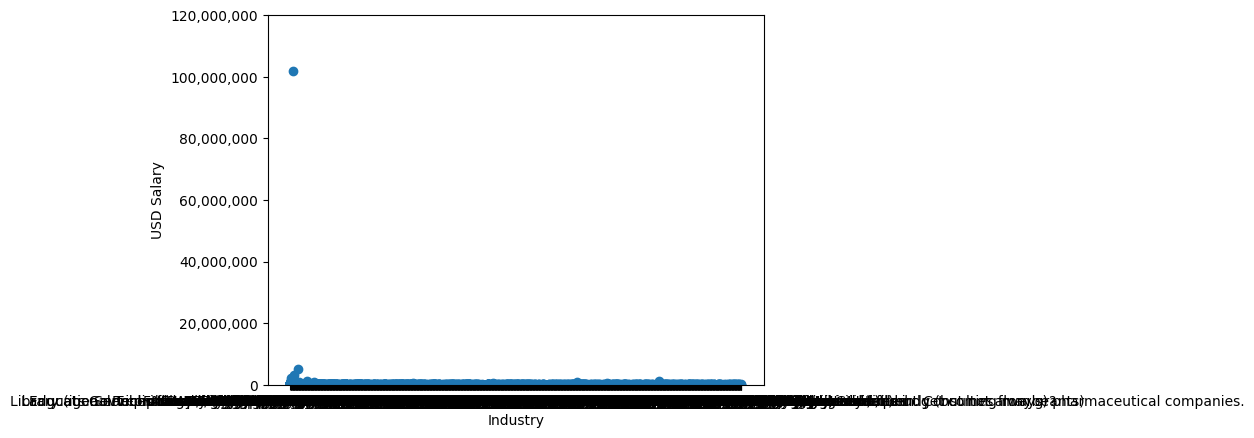

In [ ]:
plt.scatter(df['industry'], df['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
ytick_labels = [f'{y:,.0f}' for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], ytick_labels)
plt.ylim(0, plt.ylim()[1])
plt.show()

Pada visualisasi di atas, terdapat 1 outlier dengan gaji di atas 100.000.000 USD

###Hubungan Industry terhadap Nilai Maksimum Gaji

Untuk melihat outlier dan juga nilai maximum setiap industry

In [ ]:
industry_salary = df[['industry', 'usd_salary']]
industry_salary_max = industry_salary.groupby(['industry'])['usd_salary'].max().reset_index()
industry_salary_max = industry_salary_max.sort_values(by=['usd_salary'], ascending=False)
industry_salary_max = industry_salary_max.reset_index(drop=True)
industry_salary_max

,industry,usd_salary
0,Utilities & Telecommunications,102000000
1,Sales,5000044
2,Art & Design,3000000
3,Computing or Tech,2111538
4,Health care,1900000
...,...,...
1204,Customer service,55
1205,Museum (University Affiliated),40
1206,student,0
1207,Stay-at-home parent,0


Didapatkan bahwa industry dengan gaji terbesar berdasarkan nilai max adalah Industri Utilities & Telecommunications dengan gaji 102.000.000 USD

In [ ]:
max_salary_idx = df['usd_salary'].idxmax()
df.loc[max_salary_idx]

Timestamp                                              2021-04-27 12:11:16.839000
age                                                                         25-34
industry                                           Utilities & Telecommunications
job_title                                                      Operations Manager
job_title_additional_context                                                  NaN
salary                                                                  102000000
additional_salary                                                             NaN
currency                                                                      USD
other_currency                                                                COP
income_additional_context       Colombian peso - converting to usd it seems lo...
country                                                                  Colombia
us_country                                                                    NaN
city            

Terlihat pada data di atas pekerjaan dengan gaji 102.000.000 USD adalah Operations Manager. Tetapi anehnya, dia entry data currency sebagai USD namun entry juga di other_currency sebagai COP (Colombian Peso). Jika dilihat income_additional_context nya, "Colombian peso - converting to usd it seems low, but in terms of local value, it is quite high" tidak jelas apakah currency nya USD atau COP, tetapi dilihat dari Countrynya yaitu negara Colombia. Jika memang COP maka annual salary harus di ubah ke USD untuk menghilangkan outlier ini.

Berdasarkan kesimpulan di atas, dicoba untuk mengubah data salary 102.000.000 USD menjadi COP. Data tersebut memiliki index 3605.

In [ ]:
df.loc[3605, 'new_currency'] = 'COP'
df.loc[3605, 'usd_salary'] = (df.loc[3605, 'salary'] / 4526.90)

In [ ]:
df['usd_salary'] = df['usd_salary'].astype(int)
df.loc[3605]

Timestamp                                              2021-04-27 12:11:16.839000
age                                                                         25-34
industry                                           Utilities & Telecommunications
job_title                                                      Operations Manager
job_title_additional_context                                                  NaN
salary                                                                  102000000
additional_salary                                                             NaN
currency                                                                      USD
other_currency                                                                COP
income_additional_context       Colombian peso - converting to usd it seems lo...
country                                                                  Colombia
us_country                                                                    NaN
city            

Didapatkan data pada index 3605 yang memiliki salary 102.000.000 USD  memiliki setelah diubah memiliki nominal 21370. Berikut ini persebaran data industry dan salary jika divisualisasikan.

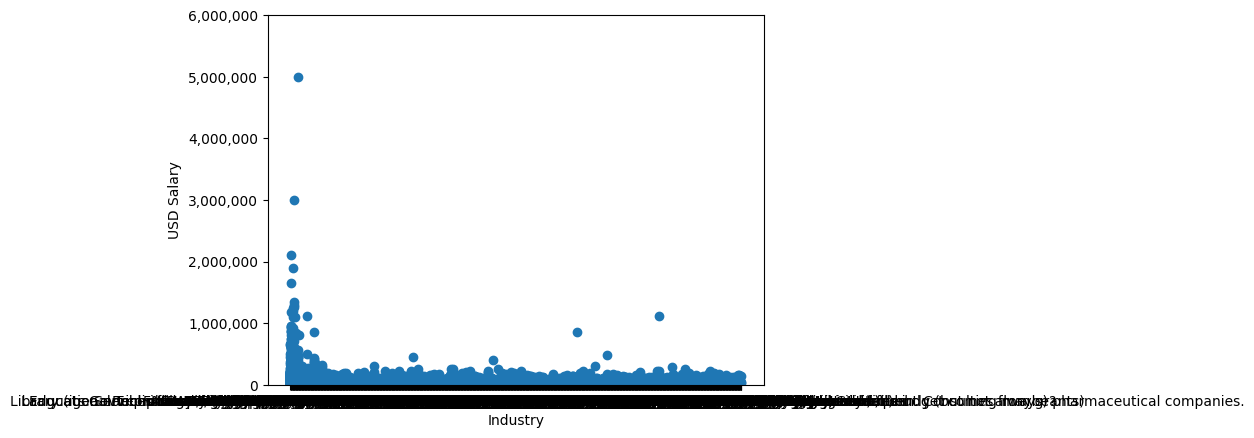

In [ ]:
plt.scatter(df['industry'], df['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
ytick_labels = [f'{y:,.0f}' for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], ytick_labels)
plt.ylim(0, plt.ylim()[1])
plt.show()

Didapatkan bahwa salary tertinggi ada di atas nominal 5.000.000 USD.



In [ ]:
max_salary_idx = df['usd_salary'].idxmax()
print(max_salary_idx)

26466


In [ ]:
df.loc[26466]

Timestamp                       2021-06-14 04:19:17.179000
age                                                  55-64
industry                                             Sales
job_title                             Inside sales manager
job_title_additional_context                           NaN
salary                                             5000044
additional_salary                                   4000.0
currency                                               USD
other_currency                                         NaN
income_additional_context                              NaN
country                                                Usa
us_country                                      New Jersey
city                                             Pinebrook
work_experience_overall                      31 - 40 years
work_experience_professional                 21 - 30 years
education                                  Master's degree
gender                                               Wom

Setelah dicari, data salary tertinggi yang dicari dengan nilai max memiliki index 26466. Industrynya adalah sales dan nominal gajinya adalah 5.000.044 USD.

###Hubungan Industry terhadap Nilai Rata-Rata Gaji

Mencari 10 industri dengan rata-rata gaji tertinggi dan terendah.

In [ ]:
# menghitung rata-rata gaji untuk setiap industri
mean_salary_by_industry = df.groupby('industry')['usd_salary'].mean()

# mengurutkan nilai rata-rata dari tertinggi ke terendah
sorted_mean_salary_by_industry = mean_salary_by_industry.sort_values(ascending=False)

# memilih 10 industri teratas dan terendah
top_10_highest_industries = sorted_mean_salary_by_industry.head(10).reset_index()
top_10_lowest_industries = sorted_mean_salary_by_industry.tail(10).reset_index()

# menampilkan hasil
result_highest = top_10_highest_industries[['industry', 'usd_salary']]
result_lowest = top_10_lowest_industries[['industry', 'usd_salary']]
print("10 industri dengan rata-rata gaji tertinggi :\n", result_highest)
print("\n10 industri dengan rata-rata gaji terendah :\n", top_10_lowest_industries)

10 industri dengan rata-rata gaji tertinggi :
                                             industry  usd_salary
0                                                Ipr   1123595.0
1                                                Oil    850617.0
2          Commercial Building Material Distribution    400000.0
3                                             Sports    300000.0
4                                 Corporate Training    280000.0
5  Energy (oil & gas & associated products, renew...    253300.0
6                         Multilateral Organisation     250000.0
7                       Pharmaceutical/biotechnology    227500.0
8                                   Customer service    222652.0
9                            Biotech/pharmaceuticals    222000.0

10 industri dengan rata-rata gaji terendah :
                                             industry  usd_salary
0                        Obligatory Military service      3269.0
1            Child Care Resource and Referral Agency      320

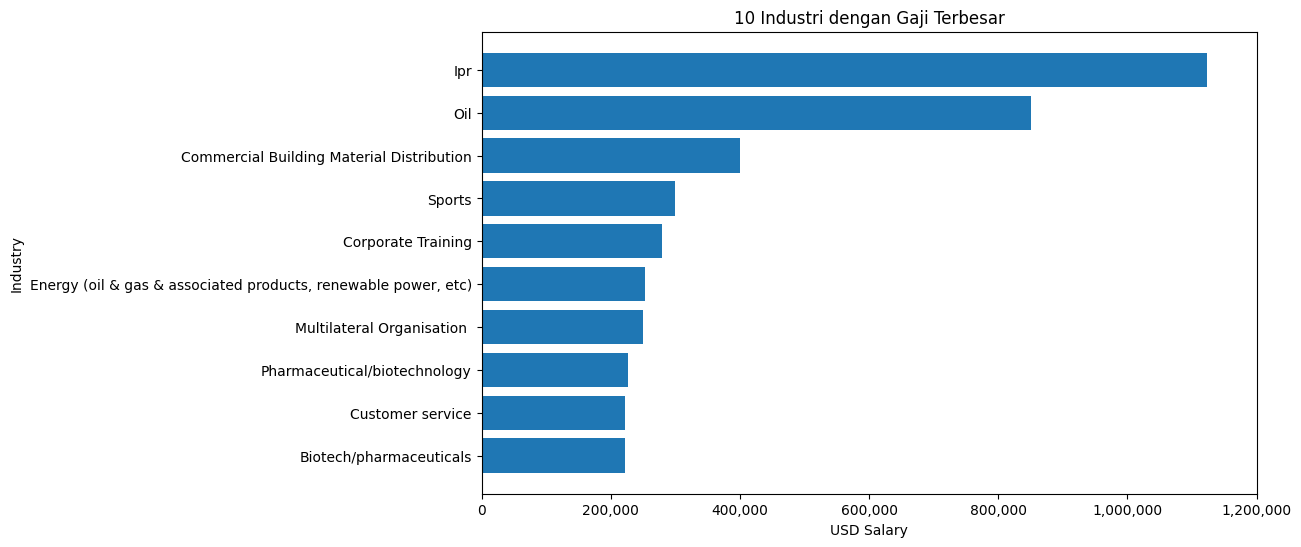

In [ ]:
# membuat horizontal bar chart untuk 10 industri teratas
plt.figure(figsize=(10, 6))
plt.barh(top_10_highest_industries['industry'], top_10_highest_industries['usd_salary'])
plt.ylim(reversed(plt.ylim()))
plt.xlabel('USD Salary')
plt.ylabel('Industry')
plt.title('10 Industri dengan Gaji Terbesar')
xtick_labels = [f'{x:,.0f}' for x in plt.xticks()[0]]
plt.xticks(plt.xticks()[0], xtick_labels)
plt.xlim(0, plt.xlim()[1])
plt.show()

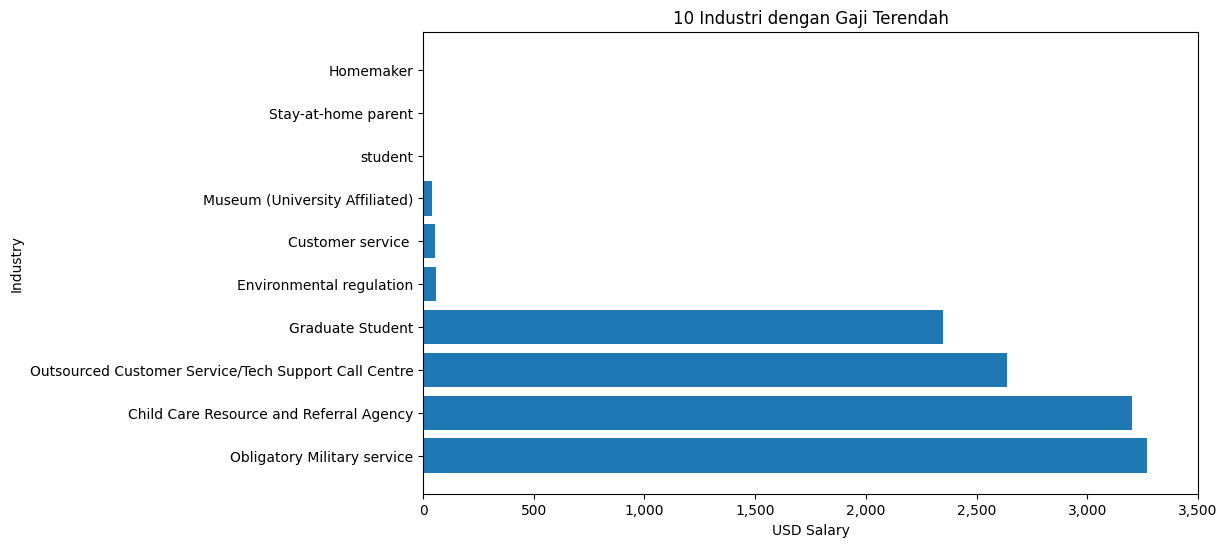

In [ ]:
# membuat horizontal bar chart untuk 10 industri terendah
plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest_industries['industry'], top_10_lowest_industries['usd_salary'])
plt.xlabel('USD Salary')
plt.ylabel('Industry')
plt.title('10 Industri dengan Gaji Terendah')
xtick_labels = [f'{x:,.0f}' for x in plt.xticks()[0]]
plt.xticks(plt.xticks()[0], xtick_labels)
plt.xlim(0, plt.xlim()[1])
plt.show()

Pada visualisasi di atas, terlihat jarak yang jauh antara rata-rata gaji industry IPR,OIL dengan industry lainnya. Dapat disimpulkan, alasannya banyak pekerja di industri IPR(Intellectual Property Rights) adalah ahli hukum atau spesialis teknologi informasi dan mungkin permintaan pasar yang tinggi untuk melindungi hak cipta perusahaan lain sehingga memungkinkan mendapatkan gaji yang relatif tinggi dari industry lainnya. Sama halnya dengan industry OIL yang merupakan pekerjaan pertambangan minyak yang termasuk pekerjaan beresiko tinggi dan membutuhkan keahlian tinggi.
 
Sebaliknya gaji terendah yaitu para pelajar (student), stay-at-home parent, dan homemaker dengan gaji 0 karena tidak mendapatkan gaji dari perusahaan atau pihak tertentu



##Hubungan Pengalaman Kerja Terhadap Gaji  

###Hubungan Pengalaman Kerja Secara Keseluruhan Terhadap Gaji  

Text(0.5, 0, 'Tahun Pengalaman Kerja')

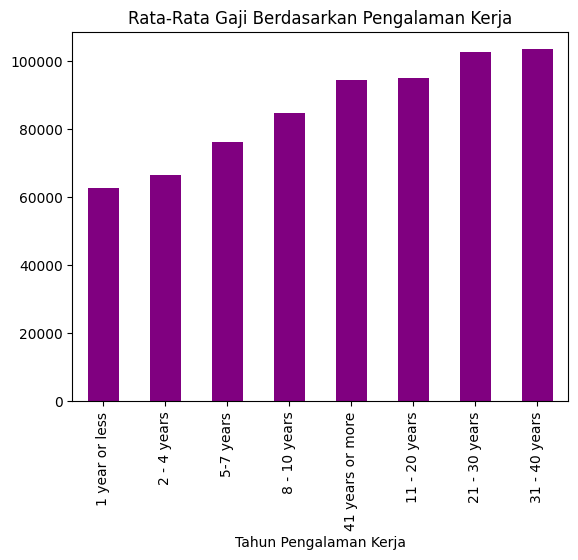

In [ ]:
mean_salary_by_year = df.groupby('work_experience_overall')['usd_salary'].mean()
mean_salary_by_year = mean_salary_by_year.sort_values()
mean_salary_by_year.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja')
plt.xlabel('Tahun Pengalaman Kerja')

Didapatkan bahwa pengalaman kerja secara keseluruhan selama 1 tahun atau kurang memiliki gaji paling rendah dan pengalaman kerja secara keseluruhan selama 31-40 tahun memiliki gaji paling tinggi. Semakin lama pekerja bekerja dan banyak mempunyai pengalaman bekerja maka akan berpengaruh terhadap besaran gaji, hal ini bisa didasari dari pangkat atau posisi, tempat atau industry, keterampilan yang dimiliki, atau faktor lainnya. Oleh karena itu, penting untuk dilakukan analisis lebih lanjut seperti menggunakan metode regresi linear untuk melihat seberapa besar pengaruh pengalaman kerja terhadap gaji

###Hubungan Pengalaman Kerja di Bidangnya Terhadap Gaji 

Text(0.5, 0, 'Tahun Pengalaman Kerja')

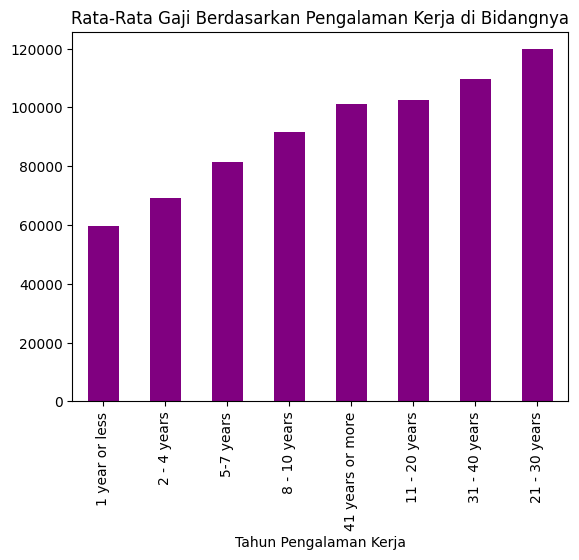

In [ ]:
mean_salary_by_year_prof = df.groupby('work_experience_professional')['usd_salary'].mean()
mean_salary_by_year_prof = mean_salary_by_year_prof.sort_values()
mean_salary_by_year_prof.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja di Bidangnya')
plt.xlabel('Tahun Pengalaman Kerja')

Didapatkan bahwa pengalaman kerja di bidangnya selama 1 tahun atau kurang memiliki gaji paling rendah dan pengalaman kerja di bidangnya selama 21 - 30 tahun memiliki gaji paling tinggi. Pengalaman kerja di bidangnya dapat berpengaruh terhadap gaji, semakin banyak pengetahuan dan keterampilan yang didapatkan, maka berpengaruh terhadap besaran gaji yang diterima.

##Hubungan Jenis Kelamin Terhadap Gaji 

Text(0.5, 0, 'Jenis Kelamin')

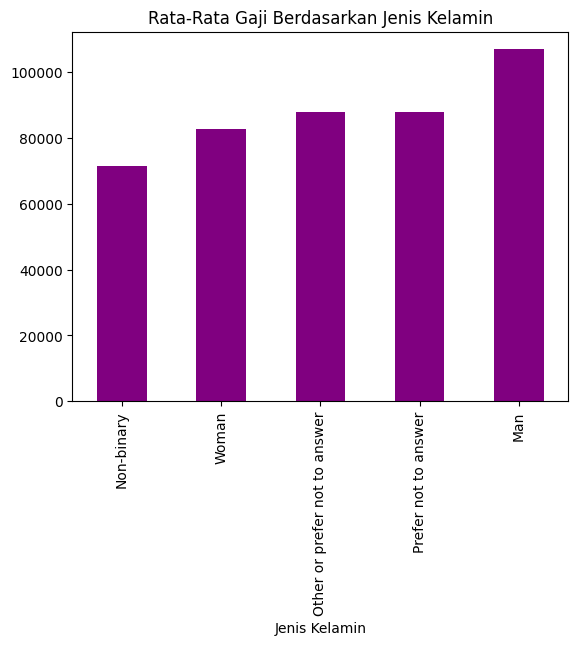

In [ ]:
mean_salary_by_gender = df.groupby('gender')['usd_salary'].mean()
mean_salary_by_gender = mean_salary_by_gender.sort_values()
mean_salary_by_gender.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')

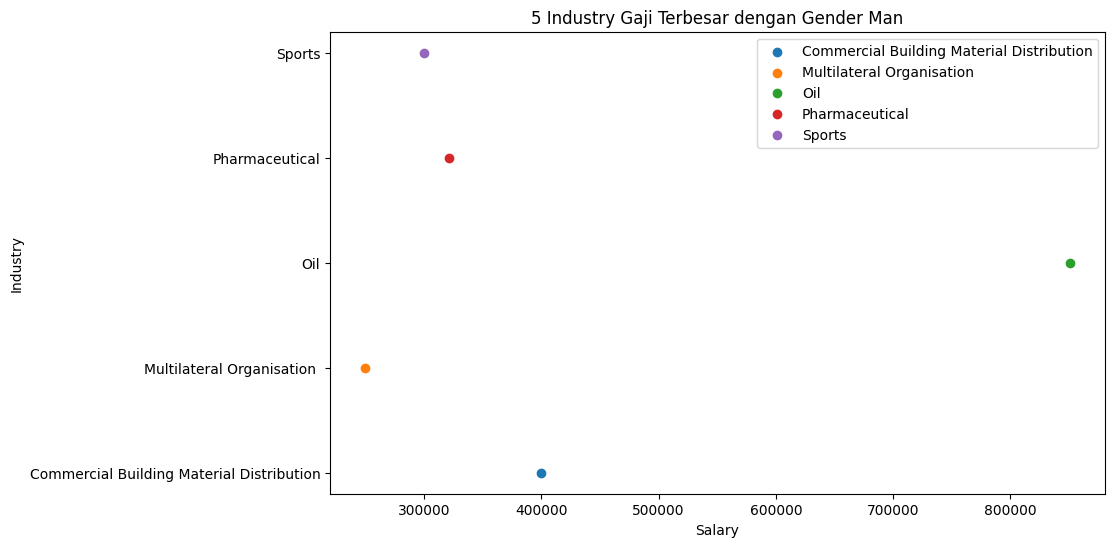

In [ ]:
# mengambil data hanya untuk gender Man
man_data = df[df['gender'] == 'Man']

# mengambil data untuk top 5 industry dengan gaji tertinggi
top5_industry = man_data.groupby('industry')['usd_salary'].mean().sort_values(ascending=False).head(5)

# membuat dataframe baru untuk top 5 industry
top5_df = man_data[man_data['industry'].isin(top5_industry.index)]

# membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))

for industry, data in top5_df.groupby('industry'):
    ax.scatter(data['usd_salary'], data['industry'], label=industry)

ax.legend()
ax.set_xlabel('Salary')
ax.set_ylabel('Industry')
ax.set_title('5 Industry Gaji Terbesar dengan Gender Man')

plt.show()

Didapatkan hubungan rata-rata gaji dengan gender yaitu dari yang gaji terendah menuju tertinggi adalah gender Non-binary, Woman, Other or prefer not to answer, Prefer not to answer, dan Man. Berdasarkan visualisasi di atas, laki-laki memiliki gaji terbesar dari dataset salary, beberapa faktor yang menyebabkan hal ini mungkin ada bias gender dalam industry, lima industry besar dengan gaji tertinggi yang banyak mempekerjakan laki-laki adalah Commercial Building Material Distribution, Pharmaceutical, Sports, Multilateral Organisation.

##Hubungan Gaji Terhadap Tingkat Pendidikan  

Text(0.5, 0, 'Tingkat Pendidikan')

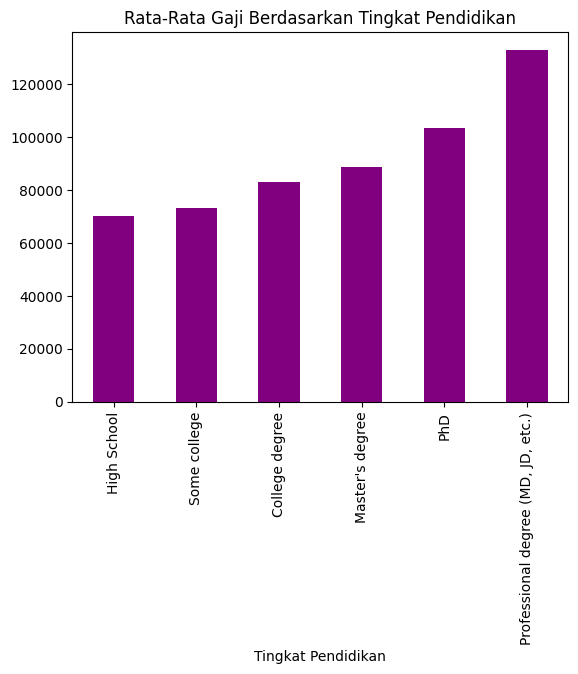

In [ ]:
mean_salary_by_education = df.groupby('education')['usd_salary'].mean()
mean_salary_by_education = mean_salary_by_education.sort_values()
mean_salary_by_education.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')

Didapatkan hubungan rata-rata gaji dengan tingkat pendidikan yaitu dari yang gaji terendah High School, College degre, Master's degree, PhD, Some college, dan Professional degree.

##Hubungan Jenis Kelamin Terhadap Tingkat Pendidikan

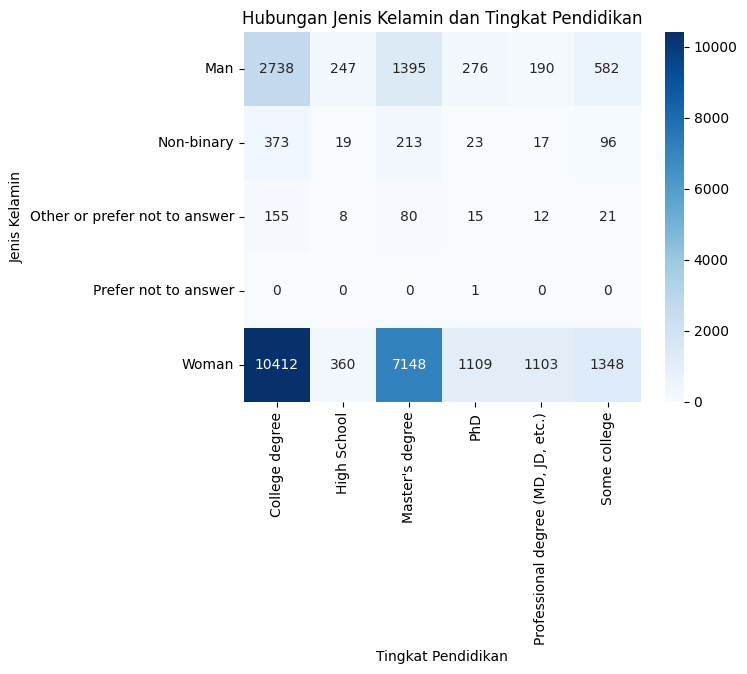

In [ ]:
# Membuat tabel kontingensi 
cont_table = pd.crosstab(df['gender'], df['education'])

# Menampilkan heatmap
sns.heatmap(cont_table, annot=True, cmap='Blues', fmt='.0f')
plt.title('Hubungan Jenis Kelamin dan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jenis Kelamin')
plt.show()

Dari tabel heatmap di atas, didapatkan kesimpulan sebagai berikut :
- Jenis kelamin 'Woman' memiliki frekuensi tingkat pendidikan terendah pada High School dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Prefer not to answer' memiliki tingkat pendidikan PhD.
- Jenis kelamin 'Other or prefer not to answer' memiliki frekuensi tingkat pendidikan terendah pada High School dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Non-binary' memiliki frekuensi tingkat pendidikan terendah pada Professional degree dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Man' memiliki frekuensi tingkat pendidikan terendah pada Professional degree dan frekuensi tingkat pendidikan tertinggi pada College degree.

#Distribusi Data Setelah Cleaning

##Persebaran Data Industry

Dilakukan distribusi data pada kolom industry dengan frekuensi kemunculan terbanyak. 

In [ ]:
industry_count = df['industry'].value_counts()
print(industry_count)

industry_unique = df['industry'].unique()
print(industry_unique)

Computing or Tech                       4689
Education (Higher Education)            2465
Nonprofits                              2428
Health care                             1888
Government and Public Administration    1887
                                        ... 
restoration                                1
IT MSP                                     1
public libraries                           1
Not for profit education consultancy       1
Fast food                                  1
Name: industry, Length: 1209, dtype: int64
['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Environmental science '
 'User Experience Design' 'Fast food']


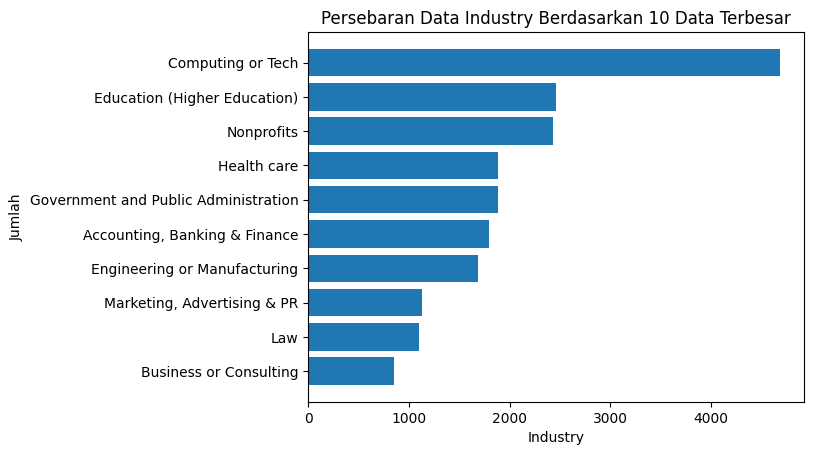

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'industry'
industry_count = df['industry'].value_counts().head(10)

# Membuat plot bar
plt.barh(industry_count.index, industry_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Industry Berdasarkan 10 Data Terbesar')
plt.xlabel('Industry')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Didapatkan bahwa data industry dengan frekuensi kemunculan terbanyak atau data terbesarnya adalah dari Computing or Tech; Education; Nonprofits; Health care; Government and Public Administration; Accounting, Banking & Finance; Engineering or Manufacturing; Marketing, Advertising & PR, Law, Business or Consulting.

Diambil sampel sebanyak 100 data dari kolom industry secara acak untuk membuat distribusi sampel. Berikut visualisasi distribusi sampel sebelum melakukan cleansing.

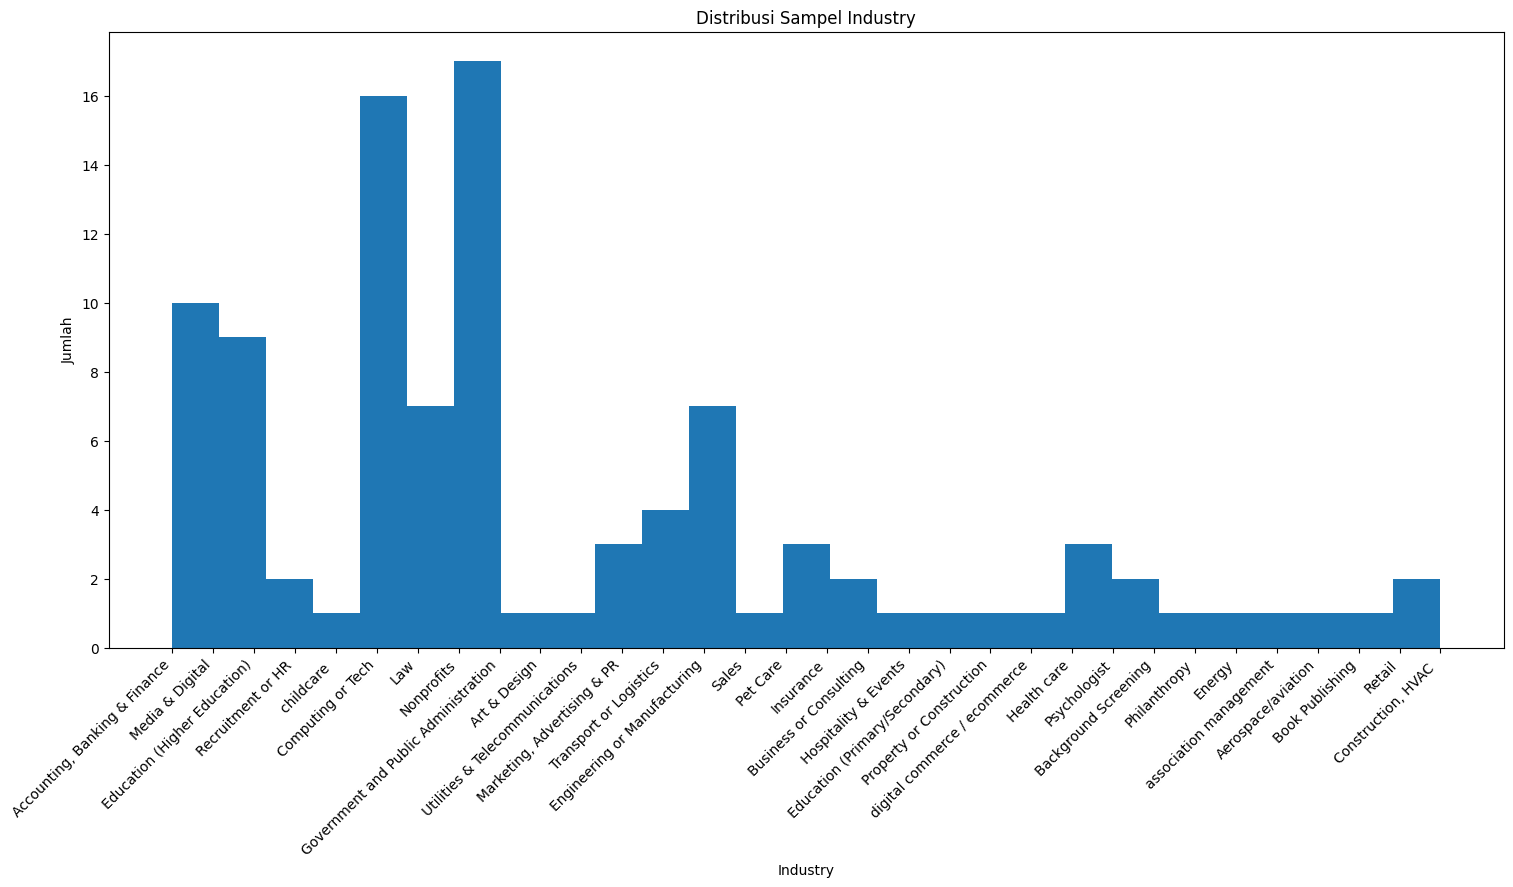

In [ ]:
plt.figure(figsize = (18, 8))
sample_industry = df["industry"].sample(n=100)
# Menambah label dan judul
plt.title('Distribusi Sampel Industry')
plt.xlabel('Industry')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.hist(sample_industry, bins=27)
plt.show()

Adapun jumlah data untuk setiap kategori industry pada distribusi sampel sebagai berikut:

In [ ]:
print(sample_industry.value_counts())

Computing or Tech                       16
Government and Public Administration    10
Education (Higher Education)             9
Law                                      7
Nonprofits                               7
Engineering or Manufacturing             7
Accounting, Banking & Finance            6
Transport or Logistics                   4
Media & Digital                          4
Health care                              3
Marketing, Advertising & PR              3
Business or Consulting                   2
Insurance                                2
Recruitment or HR                        2
Psychologist                             1
Retail                                   1
Book Publishing                          1
Aerospace/aviation                       1
association management                   1
Energy                                   1
Philanthropy                             1
Background Screening                     1
Utilities & Telecommunications           1
Sales      

##Persebaran Data Salary

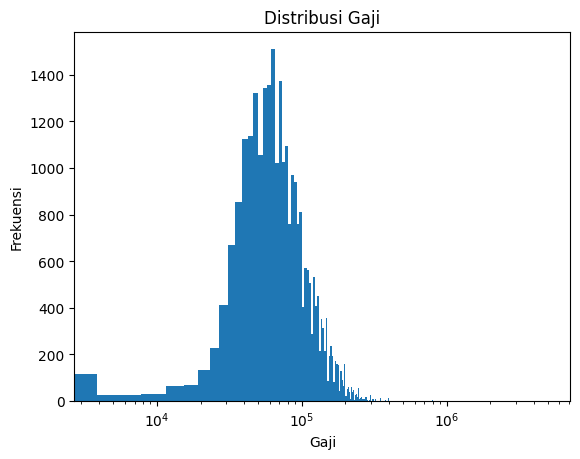

In [ ]:
# Mengatur skala log pada sumbu x
plt.xscale('log')

# Membuat plot histogram dengan bins
plt.hist(df['usd_salary'], bins=1300)

# Menambahkan label sumbu dan judul
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.title('Distribusi Gaji')

# Menampilkan plot
plt.show()

Didapatkan bahwa distribusi gaji sudah hampir mencapai distribusi normal. Ini ditandakan dengan bar yang membentuk lonceng.

##Persebaran Data Gender dan Distribusi Sampel

In [ ]:
gender_count = df['gender'].value_counts()
print(gender_count)

Woman                            21480
Man                               5428
Non-binary                         741
Other or prefer not to answer      291
Prefer not to answer                 1
Name: gender, dtype: int64


In [ ]:
education_count = df['education'].value_counts()
print(education_count)

College degree                        13678
Master's degree                        8836
Some college                           2047
PhD                                    1424
Professional degree (MD, JD, etc.)     1322
High School                             634
Name: education, dtype: int64


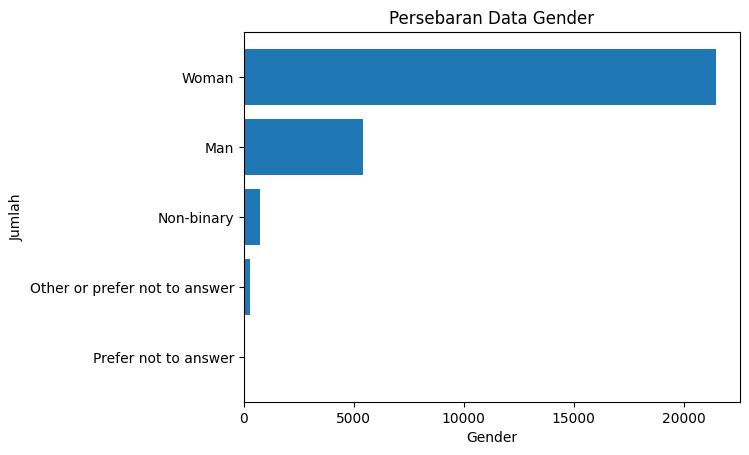

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'gender'
gender_count = df['gender'].value_counts()

# Membuat plot bar
plt.barh(gender_count.index, gender_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Didapatkan bahwa data dengan persebaran terbanyak yaitu dari Woman, Man, Non-Binary, Other or prefer not to answer, dan Prefer not to answer. Untuk data Prefer not to answer tidak terlihat bar-nya karena hanya terdiri dari 1 data. Persebarannya tidak terlalu signifikan dibandingkan sebelum dicleaning.

Kemudian dilakukan distribusi untuk 1000 sampel.

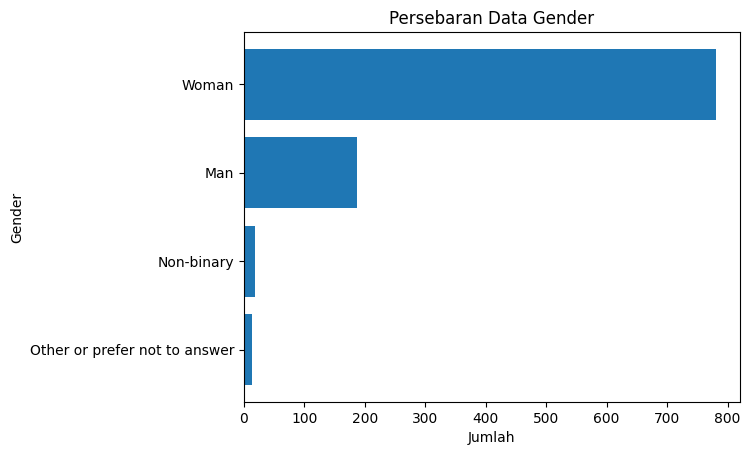

In [ ]:
sample_gender = df["gender"].sample(n=1000)

# Menghitung frekuensi gender
gender_count = sample_gender.value_counts()

# Membuat plot bar
plt.barh(gender_count.index, gender_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Gender')
plt.xlabel('Jumlah')
plt.ylabel('Gender')

# Menampilkan plot
plt.show()

In [ ]:
sample_gender.value_counts()

Woman                            781
Man                              187
Non-binary                        19
Other or prefer not to answer     13
Name: gender, dtype: int64

Didapatkan bahwa data dengan distribusi 1000 sampel gender yaitu yang terbesar dari Woman, Man, Non-Binary, dan Other or prefer not to answer.

##Persebaran Data Currency dan Distribusi Sampel

In [ ]:
currency_count = df['new_currency'].value_counts()
print(currency_count)

USD    23297
CAD     1666
GBP     1587
EUR      639
AUD      507
CHF       38
SEK       38
JPY       23
ZAR       15
INR       13
DKK       12
SGD       12
NOK       10
MYR        8
PLN        8
BRL        8
CZK        6
PHP        6
THB        5
ARS        5
HKD        4
MXN        4
KRW        4
NIS        4
ILS        3
CNY        3
NTD        2
TRY        2
COP        2
IDR        2
SAR        1
RM         1
BDT        1
LKR        1
TWD        1
RMB        1
TTD        1
NGN        1
Name: new_currency, dtype: int64


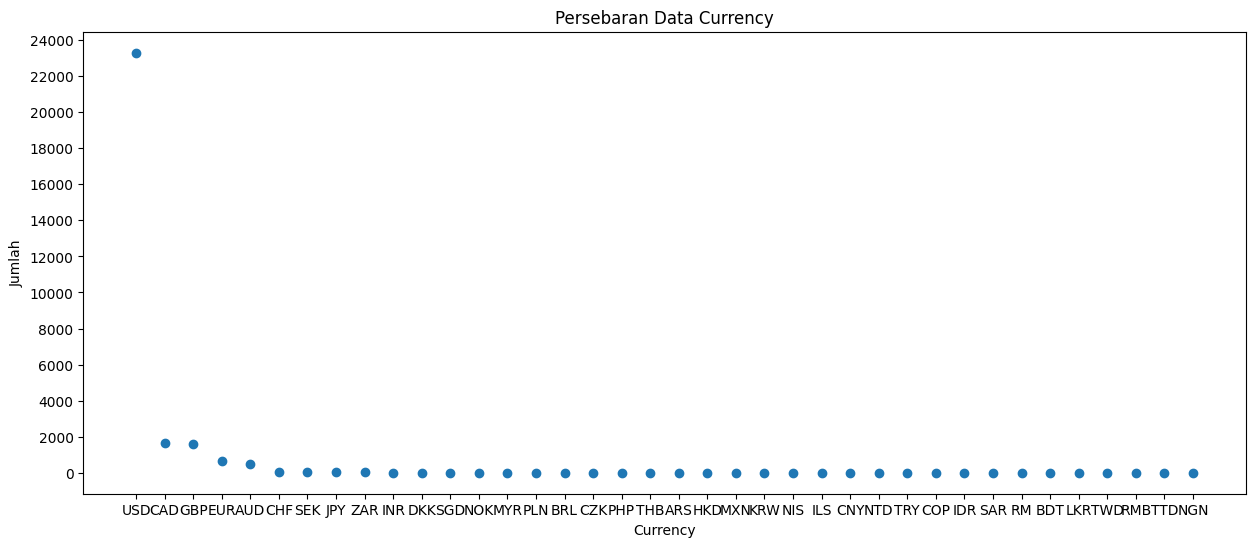

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (15, 6))
currency_count = df['new_currency'].value_counts()
plt.scatter(currency_count.index, currency_count.values)

# Menambah label dan judul
plt.title('Persebaran Data Currency')
plt.xlabel('Currency')
plt.ylabel('Jumlah')

plt.locator_params(axis='y', nbins=20)
plt.show()
plt.tight_layout()

Kemudian dilakukan distribusi sampel berdasarkan 100 mata uang terbanyak.

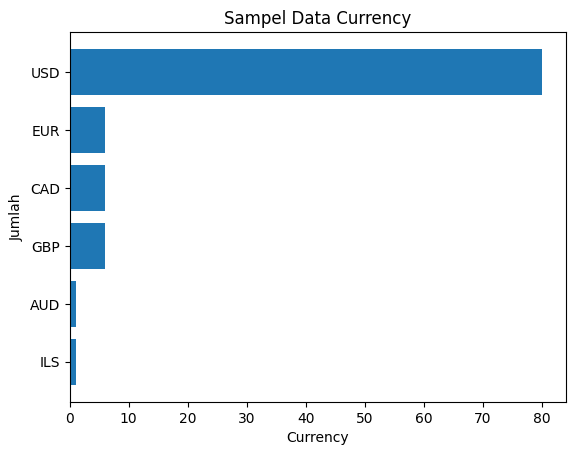

<Figure size 640x480 with 0 Axes>

In [ ]:
# Mengambil sampel 100 data dari kolom 'currency'
sample_currency = df['new_currency'].sample(n=100)

# Menghitung jumlah frekuensi pada data yang telah disample
currency_count = sample_currency.value_counts()

# Membuat plot bar
plt.barh(currency_count.index, currency_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Sampel Data Currency')
plt.xlabel('Currency')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()
plt.tight_layout()

Didapatkan bahwa data dengan distribusi 100 sampel currency dari yang terbesar yaitu USD, GBP, CAD, EUR, AUD, dan SEK.

##Persebaran Data Education

In [ ]:
education_count = df['education'].value_counts()
print(education_count)

College degree                        13678
Master's degree                        8836
Some college                           2047
PhD                                    1424
Professional degree (MD, JD, etc.)     1322
High School                             634
Name: education, dtype: int64


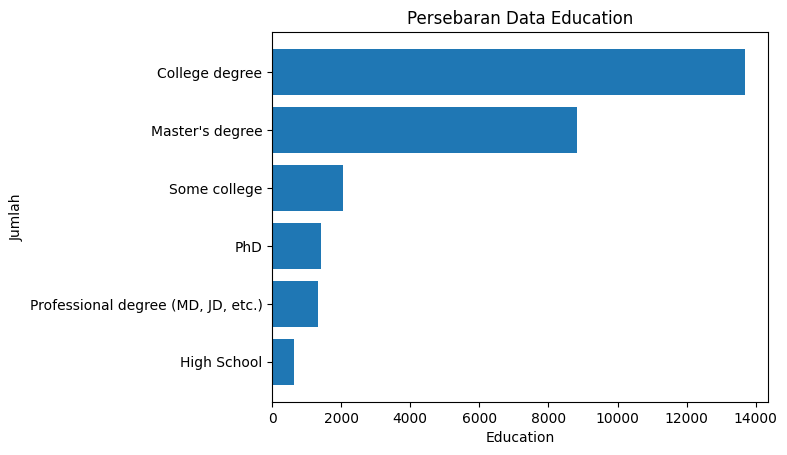

<Figure size 640x480 with 0 Axes>

In [ ]:
# Menghitung jumlah frekuensi pada kolom 'currency'
education_count = df['education'].value_counts()

# Membuat plot bar
plt.barh(education_count.index, education_count.values)
plt.ylim(reversed(plt.ylim()))

# Menambah label dan judul
plt.title('Persebaran Data Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()
plt.tight_layout()

Didapatkan bahwa data education dengan frekuensi kemunculan terbanyak atau data terbesarnya adalah dari College degree, Master's degree, Some college, PhD, Professional degree (MD, JD, etc.), dan High School.

# Uji Hipotesis



Untuk melakukan uji hipotesis, bisa menggunakan 3 metode.
1. Uji T-Test
  Dilakukan untuk melakukan uji hipotesis, apakah ada perbedaan yang signifikan antara mean dua variabel independen. Dalam t-test akan dihitung nilai t-statistic dan p-value.
   Nilai t-statistic menunjukan perbedaan mean antar variabel, semakin besar nilai t semakin besar perbedaan mean antar variabel, begitu sebaliknya.Nilai p-value menunjukan nilai probabilitas, semakin kecil nilai p-value, maka bukti bahwa perbedaan mean antar variabel kuat dan bukan kebetulan 

2. Uji ANOVA Test
  ANOVA digunakan untuk membandingkan rata-rata dari tiga atau lebih kelompok yang berbeda untuk menentukan apakah ada perbedaan signifikan antara kelompok-kelompok tersebut.

3. Uji Chi-Square Test
  Chi-Sqiare digunakan untuk menguji hubungan antara dua variabel kategorikal dan menentukan apakah ada hubungan yang signifikan antara kedua variabel tersebut. 

Pada pengujian hipotesis, dihasilkan 2 variabel.
- F-statistic adalah rasio antara variansi antar kelompok dan variansi dalam kelompok. Semakin besar nilai F-statistic, semakin besar pula perbedaan antara kelompok-kelompok tersebut.
- P-value merupakan nilai probabilitas yang menunjukkan signifikansi dari perbedaan tersebut. Semakin kecil nilai p-value, semakin signifikan perbedaan tersebut. Biasanya, jika p-value kurang dari 0.05 (atau alpha = 0.05), maka dapat disimpulkan bahwa perbedaan tersebut signifikan secara statistik.

##Uji Hipotesis Industri Terhadap Gaji

Untuk pengujian hipotesis 10 industri terhadap gaji yang mana merupakan data kategorikal dengan data numerik dilakukan menggunakan ANOVA Test. ANOVA dapat digunakan untuk menguji perbedaan rata-rata antara tiga atau lebih kelompok.

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan dalam rata-rata gaji dengan kelompok industri (Ipr , Oil, Commercial Building Material Distribution, Utilities & Telecommunications, Sports, Corporate Training, Energy (oil & gas & associated products, renewable power, etc), Multilateral Organisation, Pharmaceutical/biotechnology, Customer service).
- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata gaji dengan kelompok industri (Ipr , Oil, Commercial Building Material Distribution, Utilities & Telecommunications, Sports, Corporate Training, Energy (oil & gas & associated products, renewable power, etc), Multilateral Organisation, Pharmaceutical/biotechnology, Customer service ).

In [ ]:
# Mengambil data salary berdasarkan industri
lpr = df[df['industry'] == 'Ipr']['usd_salary']
oil = df[df['industry'] == 'Oil']['usd_salary']
commercial_building = df[df['industry'] == 'Commercial Building Material Distribution']['usd_salary']
utilities_telecommunications = df[df['industry'] == 'Utilities & Telecommunications']['usd_salary']
sports = df[df['industry'] == 'Sports']['usd_salary']
corporate_training = df[df['industry'] == 'Corporate Training']['usd_salary']
energy = df[df['industry'] == 'Energy (oil & gas & associated products, renewable power, etc)']['usd_salary']
multilateral_organisation = df[df['industry'] == 'Multilateral Organisation ']['usd_salary']
pharmaceutical = df[df['industry'] == 'Pharmaceutical/biotechnology']['usd_salary']
cs = df[df['industry'] == 'Customer service']['usd_salary']

# Melakukan ANOVA test
f_statistic, p_value = stats.f_oneway(lpr, oil, commercial_building, utilities_telecommunications, 
                                      sports, corporate_training, energy, multilateral_organisation, 
                                      pharmaceutical,cs)
# tingkat signifikansi
alpha = 0.05

# Menampilkan hasil
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara industri dengan gaji.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara industri dengan gaji.")

F-Statistic: 138.65818523171484
P-Value: 5.9931945473483284e-111
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara industri dengan gaji.


## Uji Hipotesis Jenis Kelamin Terhadap Gaji

Hipotesis nol: rata-rata gaji laki-laki sama dengan rata-rata gaji perempuan

Hipotesis alternatif: rata-rata gaji laki-laki tidak sama dengan rata-rata gaji perempuan



In [ ]:
# Membuat subset data gaji laki-laki
salary_man = df[df['gender'] == 'Man']['usd_salary']

# Membuat subset data gaji perempuan
salary_woman = df[df['gender'] == 'Woman']['usd_salary']

# Melakukan uji t-test
t, p_value = stats.ttest_ind(salary_man, salary_woman, equal_var=False)

# tingkat signifikansi
alpha = 0.05

# Menampilkan hasil
print("t-Statistic:", f_statistic)
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara jenis kelamin dengan gaji.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara jenis kelamin dengan gaji.")

t-Statistic: 138.65818523171484
P-Value: 5.3809306062541276e-90
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara jenis kelamin dengan gaji.


##Uji Hipotesis Pendidikan Terhadap Gaji

Untuk pengujian hipotesis pendidikan terhadap gaji yang mana merupakan data kategorikal dengan data numerik dilakukan menggunakan ANOVA Test. ANOVA dapat digunakan untuk menguji perbedaan rata-rata antara tiga atau lebih kelompok.

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan dalam rata-rata gaji dengan kelompok pendidikan (college degree, master's degree, some college, PhD, professional degree, dan high school).
- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata gaji dengan kelompok pendidikan (college degree, master's degree, some college, PhD, professional degree, dan high school).

In [ ]:
# Mengambil data salary berdasarkan pendidikan
college_degree = df[df['education'] == 'College degree']['usd_salary']
master_degree = df[df['education'] == "Master's degree"]['usd_salary']
some_college = df[df['education'] == 'Some college']['usd_salary']
phd = df[df['education'] == 'PhD']['usd_salary']
prof_degree = df[df['education'] == 'Professional degree (MD, JD, etc.)']['usd_salary']
high_school = df[df['education'] == 'High School']['usd_salary']

# Melakukan ANOVA test
f_statistic, p_value = stats.f_oneway(college_degree, master_degree, some_college, phd, prof_degree, high_school)

# tingkat signifikansi
alpha = 0.05

# Menampilkan hasil
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara pendidikan dengan gaji.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara pendidikan dengan gaji.")

F-Statistic: 167.14076333070946
P-Value: 9.572457170369672e-176
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara pendidikan dengan gaji.


##Uji Hipotesis Pengalaman Kerja Terhadap gaji

Untuk pengujian hipotesis pengalaman kerja terhadap gaji yang mana merupakan data kategorikal dengan data numerik dilakukan menggunakan ANOVA Test. ANOVA dapat digunakan untuk menguji perbedaan rata-rata antara tiga atau lebih kelompok.

###Uji Hipotesis Hubungan Pengalaman Kerja Secara Keseluruhan Terhadap Gaji

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan dalam rata-rata gaji dengan pengalaman kerja keseluruhan (1 year or less, 2-4 years, 5-7 years, 8-10 years, 11-20 years, 21-30 years, 31-40 years, dan 41 years or more).
- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata gaji dengan pengalaman kerja keseluruhan ( 1 year or less, 2-4 years, 5-7 years, 8-10 years, 11-20 years, 21-30 years, 31-40 years, dan 41 years or more).

In [ ]:
# Mengambil data salary berdasarkan pengalaman kerja secara keseluruhan
year_1 = df[df['work_experience_overall'] == '1 year or less']['usd_salary']
years_4 = df[df['work_experience_overall'] == '2 - 4 years']['usd_salary']
years_7 = df[df['work_experience_overall'] == '5-7 years']['usd_salary']
years_10 = df[df['work_experience_overall'] == '8 - 10 years']['usd_salary']
years_20 = df[df['work_experience_overall'] == '11 - 20 years']['usd_salary']
years_30 = df[df['work_experience_overall'] == '21 - 30 years']['usd_salary']
years_40 = df[df['work_experience_overall'] == '31 - 40 years']['usd_salary']
years_41 = df[df['work_experience_overall'] == '41 years or more']['usd_salary']

# Melakukan ANOVA test
f_statistic, p_value = stats.f_oneway(year_1, years_4, years_7, years_10, years_20, years_30, years_40, years_41)

# tingkat signifikansi
alpha = 0.05

# Menampilkan hasil
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara pengalaman kerja keseluruhan dengan gaji.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara pengalaman kerja keseluruhan dengan gaji.")

F-Statistic: 116.50037281333532
P-Value: 2.676531741840765e-169
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara pengalaman kerja keseluruhan dengan gaji.


###Uji Hipotesis Hubungan Pengalaman Kerja Profesional Terhadap Gaji

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan dalam rata-rata gaji dengan pengalaman kerja profesional (1 year or less, 2-4 years, 5-7 years, 8-10 years, 11-20 years, 21-30 years, 31-40 years, dan 41 years or more).
- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata gaji dengan pengalaman kerja profesional ( 1 year or less, 2-4 years, 5-7 years, 8-10 years, 11-20 years, 21-30 years, 31-40 years, dan 41 years or more).

In [ ]:
# Mengambil data salary berdasarkan pengalaman kerja secara keseluruhan
year_1 = df[df['work_experience_professional'] == '1 year or less']['usd_salary']
years_4 = df[df['work_experience_professional'] == '2 - 4 years']['usd_salary']
years_7 = df[df['work_experience_professional'] == '5-7 years']['usd_salary']
years_10 = df[df['work_experience_professional'] == '8 - 10 years']['usd_salary']
years_20 = df[df['work_experience_professional'] == '11 - 20 years']['usd_salary']
years_30 = df[df['work_experience_professional'] == '21 - 30 years']['usd_salary']
years_40 = df[df['work_experience_professional'] == '31 - 40 years']['usd_salary']
years_41 = df[df['work_experience_professional'] == '41 years or more']['usd_salary']

# Melakukan ANOVA test
f_statistic, p_value = stats.f_oneway(year_1, years_4, years_7, years_10, years_20, years_30, years_40, years_41)

# Menampilkan hasil
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara pengalaman kerja profesional dengan gaji.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara pengalaman kerja profesional dengan gaji.")

F-Statistic: 217.23351741350749
P-Value: 1.252406003e-315
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara pengalaman kerja profesional dengan gaji.


##Uji Hipotesis Jenis Kelamin Terhadap Tingkat Pendidikan

Untuk pengujian hipotesis jenis kelamin terhadap tingkat pendidikan yang mana merupakan data kategorikal dilakukan menggunakan ANOVA chi-square test Chi-square lebih tepat digunakan jika ingin menguji hubungan antara dua variabel kategorikal.

- Hipotesis Nol (H0): Tidak ada hubungan antara jenis kelamin dan tingkat pendidikan
- Hipotesis Alternatif (H1): Terdapat hubungan antara jenis kelamin dan tingkat pendidikan

In [ ]:
# tabel kontingensi
contingency_table = pd.crosstab(df['gender'], df['education'])

# Chi Square Test Statistic, p-value, dan derajat kebebasan
chi2_statistic, p_value, degrees_of_freedom, expected_values = chi2_contingency(contingency_table)

# tingkat signifikansi
alpha = 0.05

# hasil uji hipotesis
print("P-Value:", p_value)
print("alpha:", alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat hubungan antara jenis kelamin dan tingkat pendidikan.")
else:
    print("Hipotesis nol diterima. Tidak terdapat hubungan antara jenis kelamin dan tingkat pendidikan.")

P-Value: 1.019524512507083e-83
alpha: 0.05
Hipotesis nol ditolak. Terdapat hubungan antara jenis kelamin dan tingkat pendidikan.


##Uji Hipotesis Umur Terhadap Pengalaman Kerja Keseluruhan

# Mengubah Variabel Kategorikal ke Numerik

## Variabel Jenis Kelamin (Gender)

Varibel diubah ke numerik dengan cara mapping, karena gender terbatas ada pilihan 5, maka cara ini bisa digunakan.

In [ ]:
#maping variabel jenis kelamin
gender_map = {
    'Non-binary': 0,
    'Woman': 1,
    'Other or prefer not to answer': 2,
    'Prefer not to answer': 3,
    'Man': 4,  
}

# kolom baru untuk gender yang di ubah ke numerik
df['gender_map'] = df['gender'].map(gender_map)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,us_country,city,work_experience_overall,work_experience_professional,education,gender,race,new_currency,usd_salary,gender_map
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,55000,1
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,67407,0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,34000,1
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,62000,1
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,60000,1


## Variabel Industry

Variabel industry diubah ke numerik dengan cara encoding karena merupakan variabel kategorikal dengan jumlah kategori yang banyak

In [ ]:
# Melakukan Label Encoding pada variabel industry
df['industry_encoded'] = LabelEncoder().fit_transform(df['industry'])
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,city,work_experience_overall,work_experience_professional,education,gender,race,new_currency,usd_salary,gender_map,industry_encoded
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,55000,1,311
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,67407,0,213
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,34000,1,21
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,62000,1,699
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,60000,1,21


## Variabel Pendidikan (Education)

Merubah variabel education ke numerik dengan cara mapping karena education ada 6 kategori dan memiliki tingkatan pendidikan

In [ ]:
#maping variabel education
education_map = {
    'High School' : 0,
    'Professional degree (MD, JD, etc.)' : 1,
    'PhD' : 2,
    'Some college' : 3, 
    "Master's degree" : 4,
    'College degree' : 5
}

# kolom baru untuk education yang di ubah ke numerik
df['education_map'] = df['education'].map(education_map)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,work_experience_overall,work_experience_professional,education,gender,race,new_currency,usd_salary,gender_map,industry_encoded,education_map
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,White,USD,55000,1,311,4
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,67407,0,213,5
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,34000,1,21,5
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,White,USD,62000,1,699,5
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,White,USD,60000,1,21,5


## Variabel Pengalaman Kerja Professional(Work_Experience_Professional)

Variabel work_experience_professional untuk mengubah ke numerik, memiliki 8 kategori range lama bekerja di bidangnya, maka menggunakan mapping nilai tengah dari range tersebut

In [ ]:
#maping variabel pengalaman kerja
work_experience_professional_map = {
    '1 year or less': 0.5,
    '2 - 4 years': 3,
    '5-7 years': 6,
    '8 - 10 years': 9,
    '11 - 20 years': 15.5,
    '21 - 30 years': 25.5,
    '31 - 40 years': 35.5,
    '41 years or more': 41
}

# kolom baru untuk pengalaman kerja yang di ubah ke numerik
df['work_experience_professional_map'] = df['work_experience_professional'].map(work_experience_professional_map)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,work_experience_professional,education,gender,race,new_currency,usd_salary,gender_map,industry_encoded,education_map,work_experience_professional_map
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,5-7 years,Master's degree,Woman,White,USD,55000,1,311,4,6.0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,5-7 years,College degree,Non-binary,White,GBP,67407,0,213,5,6.0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,2 - 4 years,College degree,Woman,White,USD,34000,1,21,5,3.0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,USD,62000,1,699,5,6.0
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,USD,60000,1,21,5,6.0


## Variabel Pengalaman Kerja Keseluruhan(Work_Experience_Overall)

In [ ]:
#maping variabel pengalaman kerja
work_experience_overall_map = {
    '1 year or less': 0.5,
    '2 - 4 years': 3,
    '5-7 years': 6,
    '8 - 10 years': 9,
    '11 - 20 years': 15.5,
    '21 - 30 years': 25.5,
    '31 - 40 years': 35.5,
    '41 years or more': 41
}

# kolom baru untuk pengalaman kerja yang di ubah ke numerik
df['work_experience_overall_map'] = df['work_experience_overall'].map(work_experience_overall_map)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,education,gender,race,new_currency,usd_salary,gender_map,industry_encoded,education_map,work_experience_professional_map,work_experience_overall_map
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,Master's degree,Woman,White,USD,55000,1,311,4,6.0,6.0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,College degree,Non-binary,White,GBP,67407,0,213,5,6.0,9.0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,College degree,Woman,White,USD,34000,1,21,5,3.0,3.0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,College degree,Woman,White,USD,62000,1,699,5,6.0,9.0
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,College degree,Woman,White,USD,60000,1,21,5,6.0,9.0


## Variabel Umur (Age)

Variabel umur merubah ke numerik. Variabel umur memiliki 7 kategori range umur, dilakukan mapping umur dengan menggunakan nilai tengah

In [ ]:
#maping variabel umur
age_map = {
    'under 18': 9,
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or over': 70
}

# kolom baru untuk umur yang di ubah ke numerik
df['age_map'] = df['age'].map(age_map)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,...,gender,race,new_currency,usd_salary,gender_map,industry_encoded,education_map,work_experience_professional_map,work_experience_overall_map,age_map
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,Woman,White,USD,55000,1,311,4,6.0,6.0,30
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,Non-binary,White,GBP,67407,0,213,5,6.0,9.0,30
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,Woman,White,USD,34000,1,21,5,3.0,3.0,30
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,Woman,White,USD,62000,1,699,5,6.0,9.0,30
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,Woman,White,USD,60000,1,21,5,6.0,9.0,30


# Korelasi antar Variabel Numerik

Adapun korelasi antar variabel numerik sebagai berikut.

<ipython-input-204-978b26ac6faf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

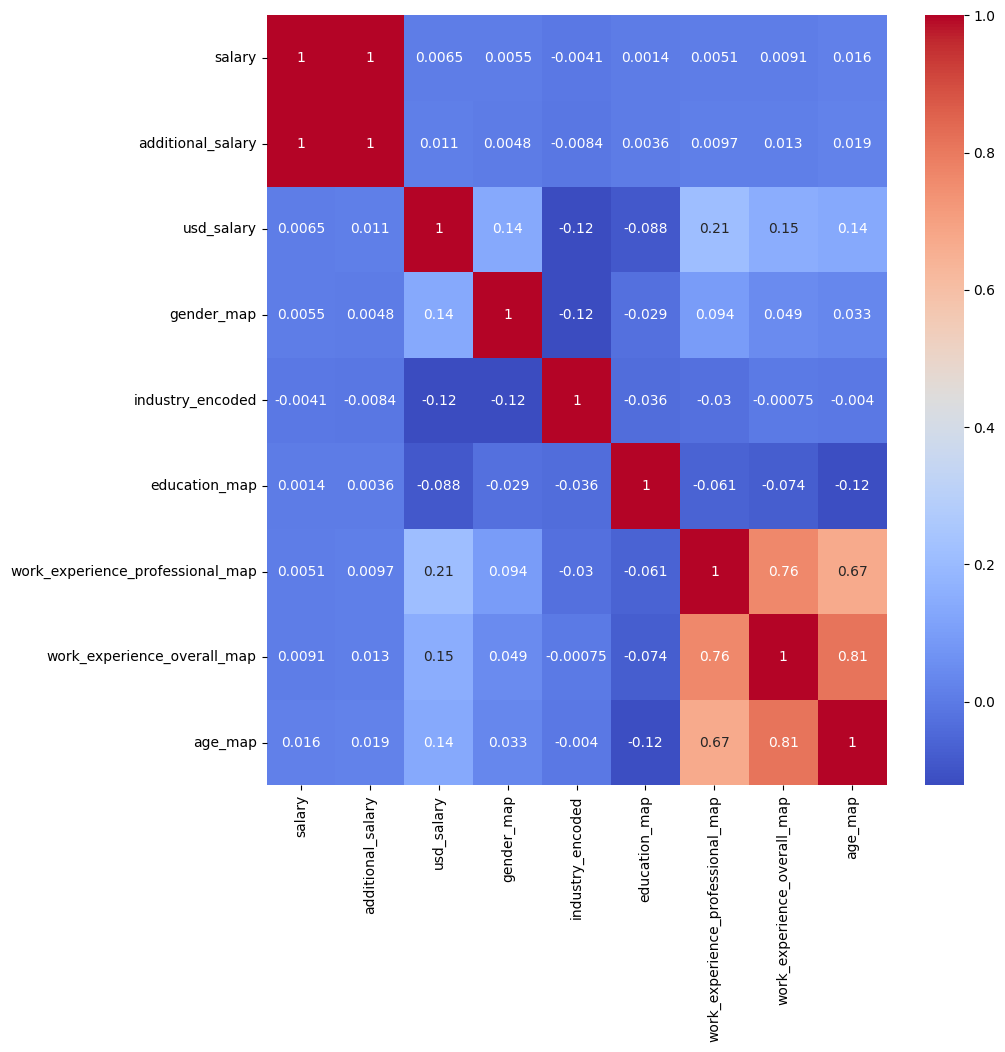

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# matriks korelasi
corr_matrix = df.corr()

# visualisasi korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Terlihat ada korelasi antara age_map dan work_experience_professional_map serta age_map dan work_experience_overall_map, semakin bertambah umur maka semakin bertambah pengalaman kerja. Korelasi ini dapat ditunjukan dalam analisis linear regresi

#Regresi Linear

Regresi linear adalah metode yg dapat membantu data scientist dalam membuat model dari beberapa variabel sehingga dapat melihat hubungan antar variabel tersebut. 
Terdapat dua variabel yang digunakan dalam regresi linear,
- Variabel independen adalah variabel yang dianggap menjadi penyebab atau pengaruh dalam perubahan nilai variabel dependen.
- Variabel dependen adalah variabel yang nilainya dipengaruhi oleh nilai variabel independen.

Pada regresi linear, dihitung nilai residual dan SSE.
- Residual adalah selisih antara nilai aktual dari variabel dependen dan nilai prediksi yang dihasilkan oleh model regresi. Dengan kata lain, residual adalah kesalahan prediksi atau "deviasi" dari nilai sebenarnya. Residual digunakan untuk mengukur kualitas kesesuaian model regresi linear dengan data, dengan tujuan untuk meminimalkan jumlah kesalahan prediksi. Semakin kecil nilai residualnya, semakin baik model regresi dalam memprediksi nilai variabel dependen.
- SSE (Sum of Squared Errors) adalah suatu metrik dalam regresi linier yang menghitung jumlah total selisih kuadrat antara nilai prediksi dari model dan nilai aktual dari data yang diobservasi. SSE digunakan untuk mengevaluasi seberapa baik model regresi linear cocok dengan data yang diamati, semakin kecil nilai SSE, semakin baik model tersebut cocok dengan data yang diobservasi.

**Keterangan : Regresi linear dilakukan untuk variabel yang dinyatakan ada hubungan di EDA, uji hipotesis, dan korelasi. Walaupun bisa cukup melakukan analisis linear regresi berdasarkan uji korelasi, namun kita ingin melihat kesesuaiannya juga dengan hasil uji hipotesis dan korelasi**

##Regresi Linear Umur dan Pengalaman Kerja

Variabel umur dan pengalaman kerja, keduanya dapat dikatakan sebagai variabel independen. Dalam kasus ini kami menggunakan umur mempengaruhi pengalaman kerja.

- Variabel independen(X): age_map
- Variabel dependen(Y): work_experience_overall_map

- Variabel independen(X_p): age_map
- Variabel dependen(Y_p): work_experience_professional_map

Text(0, 0.5, 'work_experience_overall_map')

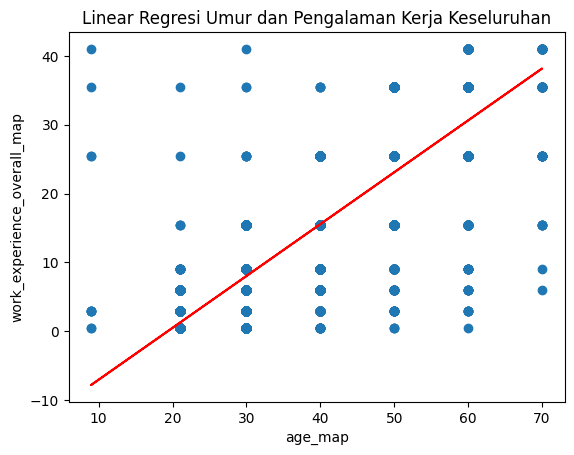

In [ ]:
# variabel independen dan dependen
X = df[['age_map']]
Y = df['work_experience_overall_map']

# garis regresi
reg = LinearRegression().fit(X, Y)
plt.plot(X, reg.predict(X), color='red')

# scatter plot
plt.scatter(X, Y)

# menambahkan label pada sumbu x dan y
plt.title("Linear Regresi Umur dan Pengalaman Kerja Keseluruhan")
plt.xlabel('age_map')
plt.ylabel('work_experience_overall_map')

Text(0, 0.5, 'work_experience_professional_map')

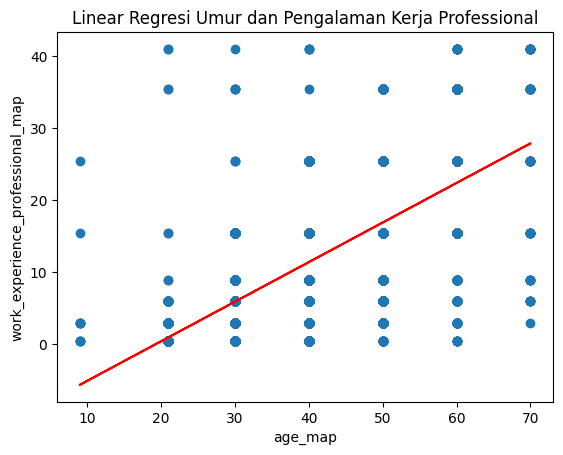

In [ ]:
# variabel independen dan dependen
X_p = df[['age_map']]
Y_p = df['work_experience_professional_map']

# garis regresi
reg = LinearRegression().fit(X_p, Y_p)
plt.plot(X_p, reg.predict(X_p), color='red')

# scatter plot
plt.scatter(X_p, Y_p)

# menambahkan label pada sumbu x dan y
plt.title("Linear Regresi Umur dan Pengalaman Kerja Professional")
plt.xlabel('age_map')
plt.ylabel('work_experience_professional_map')

In [ ]:
# menghitung nilai residual (error) dan sum of squared errors (SSE)
residuals = Y - reg.predict(X)
sse = np.sum(residuals ** 2)

print('Residuals:')
print(residuals)
print('\nSum of Squared Errors (SSE):')
print(sse)

Residuals:
0        -25023.471209
1        -12616.471209
2        -46023.471209
3        -18023.471209
4        -20023.471209
             ...      
27941    109976.528791
27942    -46900.450234
27943    -27607.471209
27944    -34178.830647
27945    -20023.471209
Name: usd_salary, Length: 27941, dtype: float64

Sum of Squared Errors (SSE):
135431639706268.94


In [ ]:
#evaluasi model pengalaman kerja keseluruhan
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.01886652819388479

Nilai R-squared sebesar 0.6630347698677235, menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam menjelaskan variasi dalam data dan dapat menjelaskan sekitar 66,3% dari variasi dalam data. Oleh karena itu, dapat dikatakan bahwa model cukup baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan.


In [ ]:
#evaluasi model pengalaman kerja professional
y_pred_p = reg.predict(X_p)
r2_score(Y_p, y_pred_p)

0.4476686214418133

Nilai R-squared sebesar 0.15783232020341031, menunjukkan bahwa model memiliki kemampuan yang tidak baik dalam menjelaskan variasi dalam data dan hanya dapat menjelaskan sekitar 15,7% dari variasi dalam data. Oleh karena itu, dapat dikatakan bahwa model tidak baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan.

Analisis: dapat dikatakan semakin bertambah umur maka semakin bertambah pengalaman kerja, dan untuk pengalaman kerja di bidangnya dilihat sedikit menunjukan kenaikan pengalaman, salah satu faktor yaitu pekerja memiliki umur yang berbeda untuk menekuni atau professional di keterampilan bidang pekerjaan tertentu, dan faktor lainnya.

##Regresi Linear Jenis Kelamin dan Gaji

- Variabel independen (x): gender
- Variabel dependen (y): salary

Kemudian dilakukan visualisasi data gender_map terhadap usd_salary menggunakan scatter plot.

Text(0, 0.5, 'usd_salary')

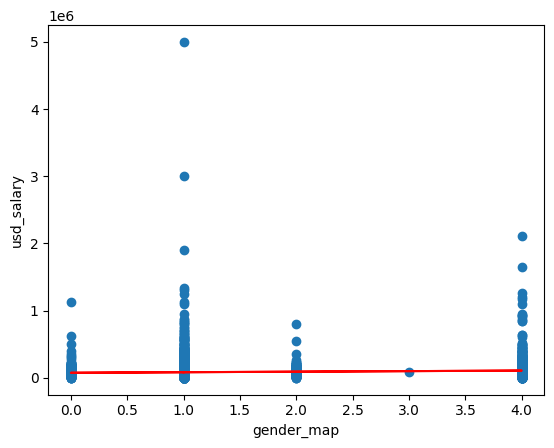

In [ ]:
# set variabel independen dan dependen
X = df[['gender_map']]
Y = df['usd_salary']

# membuat garis regresi
reg = LinearRegression().fit(X, Y)
plt.plot(X, reg.predict(X), color='red')

# membuat scatter plot
plt.scatter(X, Y)

# menambahkan label pada sumbu x dan y
plt.xlabel('gender_map')
plt.ylabel('usd_salary')

In [ ]:
# menghitung nilai residual (error) dan sum of squared errors (SSE)
residuals = Y - reg.predict(X)
sse = np.sum(residuals ** 2)

print('Residuals:')
print(residuals)
print('\nSum of Squared Errors (SSE):')
print(sse)

Residuals:
0       -27644.091390
1        -7103.779917
2       -48644.091390
3       -20644.091390
4       -22644.091390
             ...     
27941    82955.974192
27942   -27644.091390
27943   -30228.091390
27944   -71044.025808
27945   -22644.091390
Name: usd_salary, Length: 27941, dtype: float64

Sum of Squared Errors (SSE):
135329491941643.19


Dari hasil perhitungan nilai residuals dan SSE, didapatkan bahwa :
- Nilai residual bervariasi
- Hasil SSE, yaitu 135329491941643.19. Menunjukkan bahwa model regresi linear yang dibuat tidak cukup baik dalam menjelaskan variasi pada data. SSE yang tinggi menunjukkan bahwa terdapat banyak kesalahan (error) dalam prediksi model terhadap data yang diobservasi.

Kemudian model dievaluasi dengan mencari nilai R-squared.

In [ ]:
#evaluasi model
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.01960653688876479

Nilai R-squared yang diperoleh sebesar 0.0007905212025127728 menunjukkan bahwa model tidak dapat menjelaskan variasi data secara memadai. Dapat dikatakan bahwa model tidak baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan. 

##Regresi Linear Jenis Kelamin, Industri, dan Gaji

- Variabel independen (x): gender, industry
- Variabel dependen (y): salary

Setelah itu dilakukan pembuatan model dan menentukan variabel independen serta dependen. Hubungan antar variabel divisualisasikan dengan scatter plot.

<Axes: xlabel='gender_map', ylabel='usd_salary'>

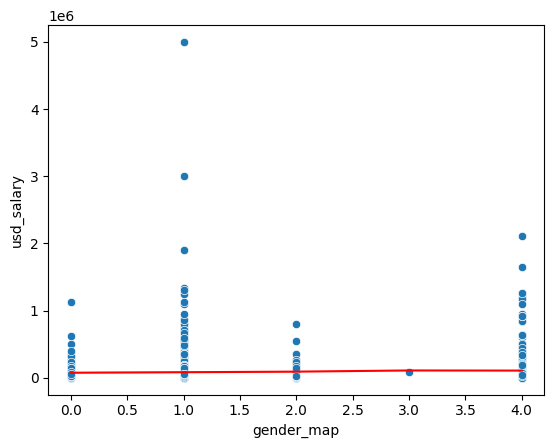

In [ ]:
# Membuat model regresi linear
model = LinearRegression()

# Menentukan variabel independen dan variabel dependen
X = df[['gender_map', 'industry_encoded']]
Y = df['usd_salary']

# Melakukan pelatihan model dengan data latih
model.fit(X, Y)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X)

# Membuat scatter plot
sns.scatterplot(x=X['gender_map'], y=Y)

# Membuat line plot
sns.lineplot(x=X['gender_map'], y=y_pred , color='red')

Terakhir, dilakukan evaluasi model.

In [ ]:
#evaluasi model
y_pred = model.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.030423537657946698

Nilai R-squared yang diperoleh sebesar 0.0008021441733391255 menunjukkan bahwa model tidak dapat menjelaskan variasi data secara memadai. Dapat dikatakan bahwa model tidak baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan.

##Regresi Linear Pendidikan dan Gaji

Variabel independen (x): education

Variabel dependen (y): salary


Kemudian dilakukan visualisasi data education_map terhadap usd_salary menggunakan scatter plot.

Text(0, 0.5, 'usd_salary')

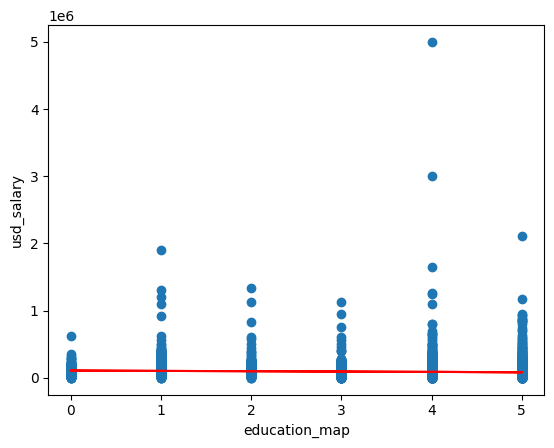

In [ ]:
# set variabel independen dan dependen
X = df[['education_map']]
Y = df['usd_salary']

# membuat garis regresi
reg = LinearRegression().fit(X, Y)
plt.plot(X, reg.predict(X), color='red')

# membuat scatter plot
plt.scatter(X, Y)

# menambahkan label pada sumbu x dan y
plt.xlabel('education_map')
plt.ylabel('usd_salary')

In [ ]:
# menghitung nilai residual (error) dan sum of squared errors (SSE)
residuals = Y - reg.predict(X)
sse = np.sum(residuals ** 2)

print('Residuals:')
print(residuals)
print('\nSum of Squared Errors (SSE):')
print(sse)

Residuals:
0        -32657.603548
1        -15303.903534
2        -48710.903534
3        -20710.903534
4        -22710.903534
             ...      
27941    107289.096466
27942    -27710.903534
27943    -35241.603548
27944    -46710.903534
27945    -22710.903534
Name: usd_salary, Length: 27941, dtype: float64

Sum of Squared Errors (SSE):
136976921752758.62


- Nilai residual bervariasi dari sekitar -50.000 hingga sekitar 105.943.
- Hasil SSE sangat besar, yaitu 1.0521640563551164e+16. Menunjukkan bahwa model regresi linear yang dibuat tidak cukup baik dalam menjelaskan variasi pada data. SSE yang tinggi menunjukkan bahwa terdapat banyak kesalahan (error) dalam prediksi model terhadap data yang diobservasi.

In [ ]:
#evaluasi model
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.0076717442978886385

Nilai R-squared sebesar 0.00023286419168078165, menunjukkan bahwa model memiliki kemampuan yang tidak bai dalam menjelaskan variasi dalam data dan hanya dapat menjelaskan sekitar 0,02% dari variasi dalam data. Oleh karena itu, dapat dikatakan bahwa model tidak baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan.

##Regresi Linear Pendidikan, Industri, dan Gaji

- Variabel independen (x): education, industry
- Variabel dependen (y): salary
Dilakukan pembuatan model dan menentukan variabel independen serta dependen. Hubungan antar variabel divisualisasikan dengan scatter plot.

<Axes: xlabel='education_map', ylabel='usd_salary'>

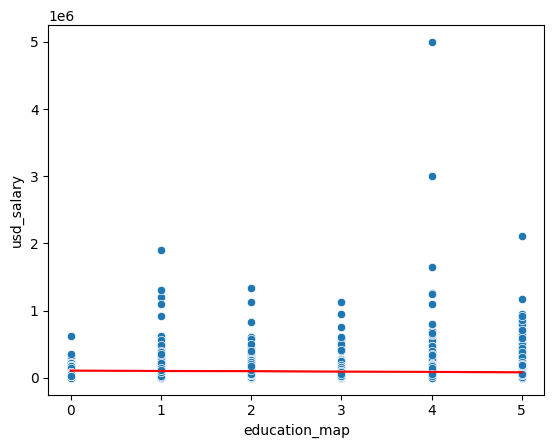

In [ ]:
# Membuat model regresi linear
model = LinearRegression()

# Menentukan variabel independen dan variabel dependen
X = df[['education_map', 'industry_encoded']]
Y = df['usd_salary']

# Melakukan pelatihan model dengan data latih
model.fit(X, Y)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X)

# Membuat scatter plot
sns.scatterplot(x=X['education_map'], y=Y)

# Membuat line plot
sns.lineplot(x=X['education_map'], y=y_pred , color='red')

Terakhir, dilakukan evaluasi model.

In [ ]:
#evaluasi model
y_pred = model.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.02293411205025797

Nilai R-squared yang diperoleh sebesar 0.000233219853242983 menunjukkan bahwa model tidak dapat menjelaskan variasi data secara memadai. Dapat dikatakan bahwa model tidak baik dalam memprediksi nilai target variabel dependen berdasarkan nilai fitur variabel indenpenden yang digunakan.

## Regresi Linear Pengalaman Kerja Profesional dan Gaji

Berdasarkan uji hipotesis, didapatkan ada perbedaan antara pengalaman kerja profesional dan gaji, maka dicoba model regresi linear apakah antar variabel ada pengaruhnya.

variabel independen(X): pengalaman kerja profesional

variabel dependen(y): gaji

Text(0, 0.5, 'usd_salary')

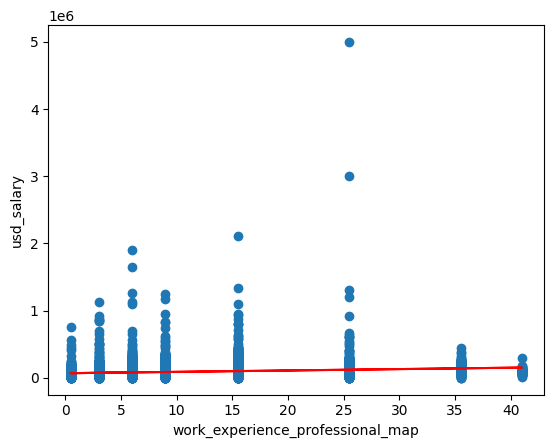

In [ ]:
# set variabel independen dan dependen
X = df[['work_experience_professional_map']]
y = df['usd_salary']

# membuat garis regresi
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')

# membuat scatter plot
plt.scatter(X, y)

# menambahkan label pada sumbu x dan y
plt.xlabel('work_experience_professional_map')
plt.ylabel('usd_salary')

In [ ]:
#evaluasi model
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.044832338871924615

nilai r squared sangat kecil yaitu 0.04476900216944413 berarti hanya memberikan kontribusi sebesar 4.48% terhadap variabel dependent (salary).Artinya, model regresi linear yang dibuat tidak terlalu baik dalam menjelaskan hubungan antara pengalaman kerja dan gaji

Hal ini juga dapat diartikan bahwa model tersebut mungkin perlu diperbaiki atau ditambahkan dengan variabel lain yang dapat mempengaruhi gaji seperti education, atau industri 

## Regresi Linear Pengalaman Kerja Profesional, Tingkat Pendidikan, dan Gaji

variabel independen: pengalaman kerja profesional, education

variabel dependen: gaji

<Axes: xlabel='work_experience_professional_map', ylabel='usd_salary'>

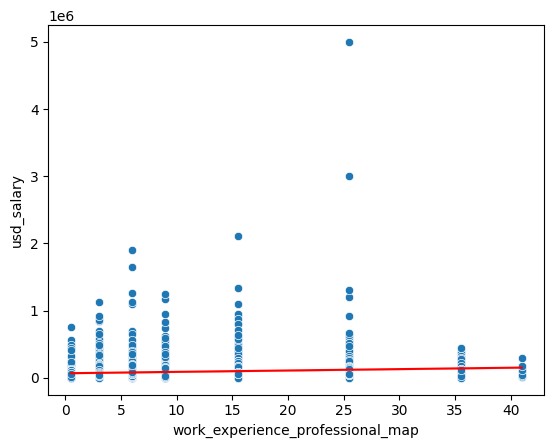

In [ ]:
# Membuat model regresi linear
model = LinearRegression()

# Menentukan variabel independen dan variabel dependen
X = df[['work_experience_professional_map', 'education_map']]
y = df['usd_salary']

# Melakukan pelatihan model dengan data latih
model.fit(X, y)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X)

# Membuat scatter plot
sns.scatterplot(x=X['work_experience_professional_map'], y=y)

# Membuat line plot
sns.lineplot(x=X['work_experience_professional_map'], y=y_pred , color='red')

In [ ]:
#evaluasi model
y_pred = model.predict(X)
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.05043131930286304

nilai R-square pada model pengalaman kerja dan gaji adalah sebesar 0.04665370587510964, maka sekitar 4.66% variasi pada gaji dapat dijelaskan oleh variasi pada pengalaman kerja dan tingkat pendidikan. Artinya, model yang dibangun belum cukup baik untuk menjelaskan hubungan antara pengalaman kerja dan gaji, karena terdapat sejumlah besar variabel pada gaji yang tidak dapat dijelaskan oleh variabel pada pengalaman kerja dan education.

## Regresi Linear Tingkat Pendidikan dan Gender


variabel dependen(y): education_encoded

variabel independen(X): gender

<Axes: xlabel='gender_map', ylabel='education_map'>

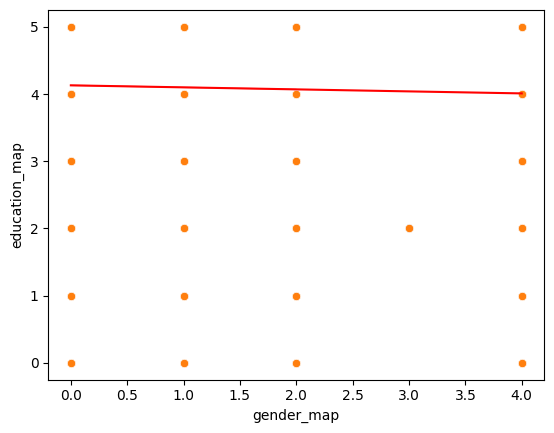

In [ ]:
# Visualisasi scatter plot
sns.scatterplot(x=df['gender_map'], y=df['education_map'])

# Membuat model regresi linear
model = LinearRegression()

# Siapkan data untuk garis regresi
X = df['gender_map'].values.reshape(-1, 1)
y = df['education_map']
reg = LinearRegression().fit(X, y)

# Melakukan fitting model
model.fit(X, y)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X)

# Membuat scatter plot
sns.scatterplot(x=X[:,0], y=y)

# Membuat line plot
sns.lineplot(x=X[:,0], y=y_pred , color='red')

Tidak ada hubungan

## Regresi Linear Umur dan Gaji

Variabel independen (x): age_map

Variabel dependen (y): usd_salary

melihat pola garis antara dua variabel

Text(0, 0.5, 'usd_salary')

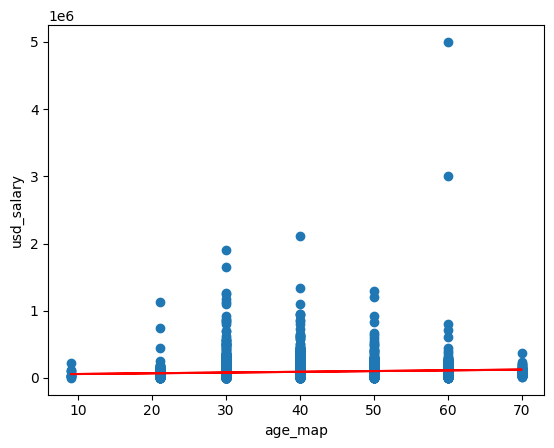

In [ ]:
# set variabel independen dan dependen
X = df[['age_map']]
y = df['usd_salary']

# membuat garis regresi
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')

# membuat scatter plot
plt.scatter(X, y)

# menambahkan label pada sumbu x dan y
plt.xlabel('age_map')
plt.ylabel('usd_salary')

In [ ]:
#evaluasi model
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.01886652819388479

nilai r squared sangat kecil yaitu 0.018820246840124732 berarti hanya memberikan kontribusi sebesar 1.88% terhadap variabel dependent (salary). Sisanya, sekitar 98.12%. Artinya, model regresi linear yang dibuat tidak terlalu baik dalam menjelaskan hubungan antara age dan salary